ID:A1826


Submission Date: 29-04-2019 

# Problem title: House Prices prediction with Deep neural Network

# Table of content (Preprocessing)
1. Abstract
2. Dataset  Analysis
3. Workflow Diagram
4. Insights of DNN Architecture 
5. Importing diagram and libraries 
6. Understanding the problem label data
7. Dataset authur's recommended changes  
8. Data set Concatanation
9. Justifying my reason to take log of saleprice
10. Checking for missing data and handling those
11. Visualize the distribution
12. Black List of feature
13. Feature Encoding for catagorical feature 
14. Feature  Engineering
15. Simplifying Feature
16. Combine Existing Feature to construct new feature
17. Double simpling of featues 
18. Feature Type Analysis
19. Explaination for choices for missing data handling and label encoding
20. Search for skewness
21. Fixing skewness with Boxcox transformation
22. Scalling with Standard Scaler
23. Removing black listed feature
24. one hot encoding
25. Splitting Data back to Train and Test set
26. Removing Out layers with isolation forest
27. Dimenstinality Reduction:Principle Component analysis (PCA)
28. Manifold learning:Locally Linear Embedding (LLE)

# Table of content (Neural Network Model)
29. Processing data for feeding Neural Network
30. Splitting Training set to valid-train set
31. Learning rate scheduling (Exponential scheduling) 
32. Dropout initialization
33. Max norm regularization initialization
34. He initialization
35. Activation Function (ELU)
37. Gradient Clipping
38. Learning Curve
39. Early stopping 
40. Batch Shuffling
41. Cross Validation
42. Prototype model for rapid testing
43. Failed trails
44. Hyperparameter search for best parameter
45. Justifying parameter choice 
46. Key Insights of Parameter search
47. Prediction using best parameter 
48. Discussion
49. References  



# Abstract
House Price prediction is a very popular dataset for data science competitions. In this dataset, 79 explanatory variables describing (almost) every aspect of residential homes in Ames and Iowa. This competition challenges competitor to predict the final price of each home.<br /> 
The solution is divided into many parts. The data engineering and preprocessing are inspired by Ref 4,5,6. The Final model is the author's own work. Nothing of the model is taken from any book or blog. Although in order to learn tensor flow implementation the book ref:1 helped me a lot. Without the Knowledge taken from ref:1 and 2 this kernel would not exist.<br /> 
The main feature of this kernel is flexible. Almost everything is tunable without coding.<br /> 
The only thing I believe this kernel should have is exhaustive search implementation which I would definitely do after this one. The plain code with less preprocessing achieved only about 0.215 public scores at best.<br /> 
The plain solution without extra data preprocessing and engineering can be found in the given Github link along with other versions of the code. <br />
Github link:https://github.com/IshrakHasin/House-price/tree/master

# Dataset  Analysis
The House Price prediction data mainly contains two datasets. One for training purpose and another is used to determine the testing performance on Kaggle platform. Both train and test datasets contain same number of features i.e. 81. The training datasets contains 1460 different types of observation while test set contains 1459. The features give the information about Identification number, general zoning, lot , land type, Roof type, Pool, Garage, Electricity ,Utilities, Condition of the sale, time of selling and other information to buy a house. There are 20 continuous variables which are related to various area dimensions. Generally the size and shape unit is square feet. 14 discrete variables typically means the number of items occurring. It quantify the number of kitchens, bedrooms, and bathrooms etc. There are 46 categorical features among them 23 are nominal and rest of the ordinal features. The nominal features identify various types of garages, materials, dwellings and other living conditions while the ordinal variables rank the various items. There are total 6965 NAN values in train dataset and 7000 NAN values in test dataset. The features PoolQC, MiscFeature, Alley, and Fence have the most of the NAN values in both dataset. 
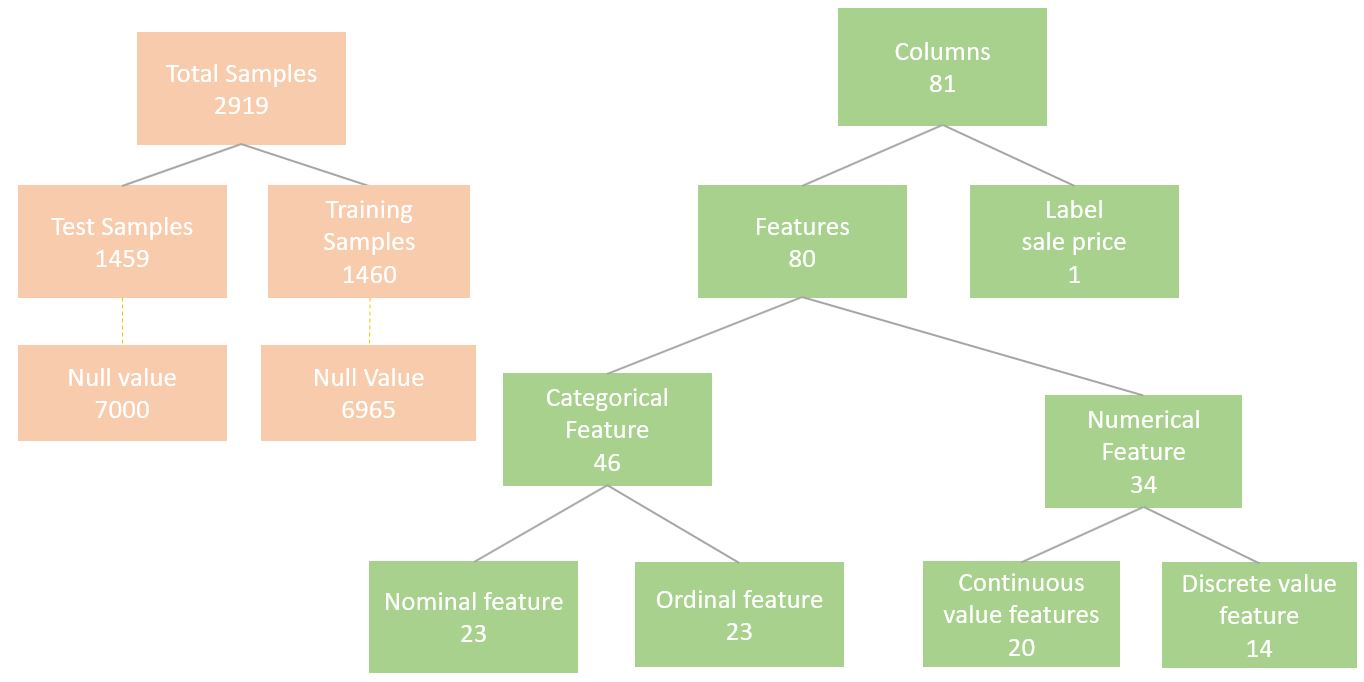



# Workflow Diagram 
From above Discussion it is cleared that data is not cleaned enough. As result we have to preprocess the data to feed in the machine learning model. The data preprocessing techniques followed by training is shown in the following block diagram: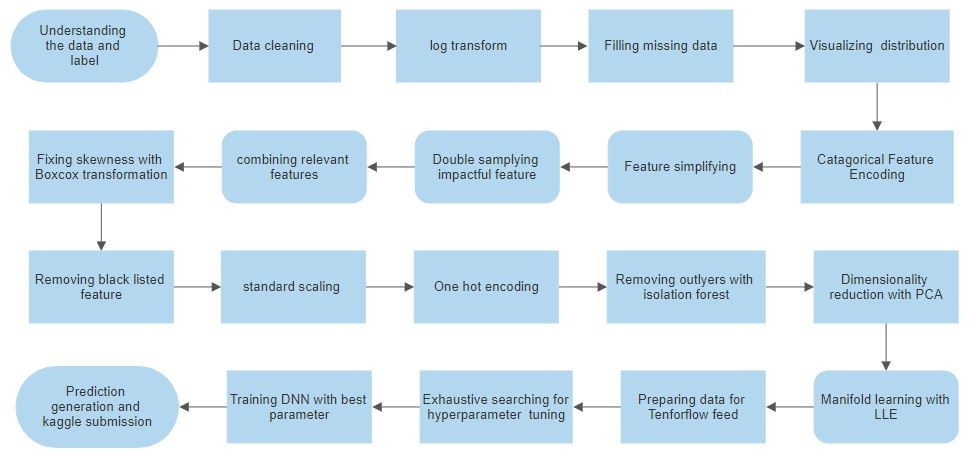

# Insights of DNN Architecture
1. Weight initialization (He initialization) is used.
2. Batch normalization is used for faster convergence and stability of the network.
3. Learning rate schedule is used for faster convergence.
4. Dropout is used and the dropout rate is tuned with exhaustive search.
5. 6 layers are used. The layer number and neuron number is tuned with exhaustive search.
6. Early stopping is used to save computation time when we get the minimal error.
7. ELU is used as an activation function. 
8. Batch Shuffling is used for learning to be more generalized.
9. Max-norm regularization is used while the upper bound of weight is leaning using exhaustive search.
Component of each layer and final result achieved in given below:
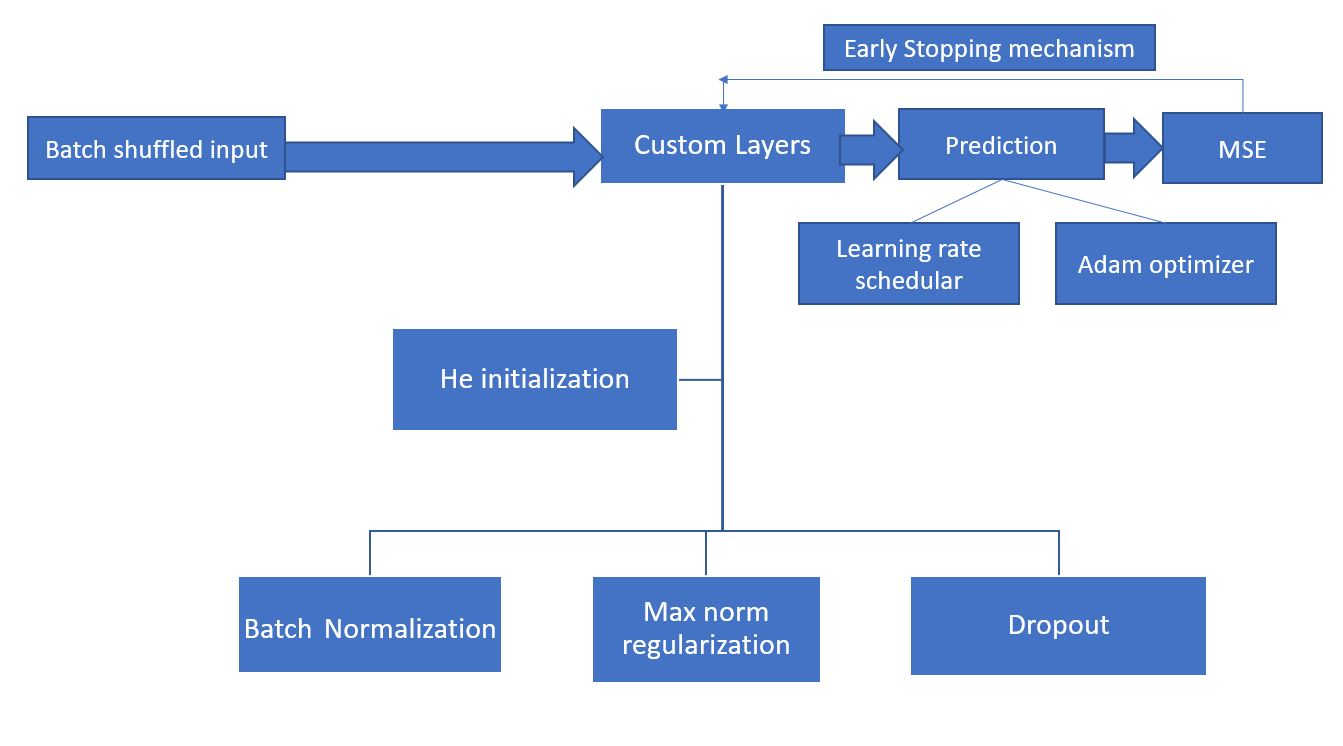
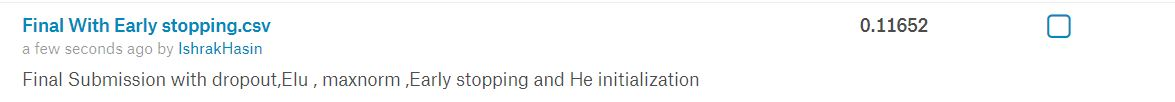

# Importing libraries and dataset

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')

In [115]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [116]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)


# Understanding the problem label data

Understanding this correlation will help us how we should encode and fillup the respective features.Such as if some feature is very sparse and has weak correlation with sale price we will drop that feature.

In [117]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Lets try to understand the correlations with other variables

In [118]:
print("most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)


most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.13

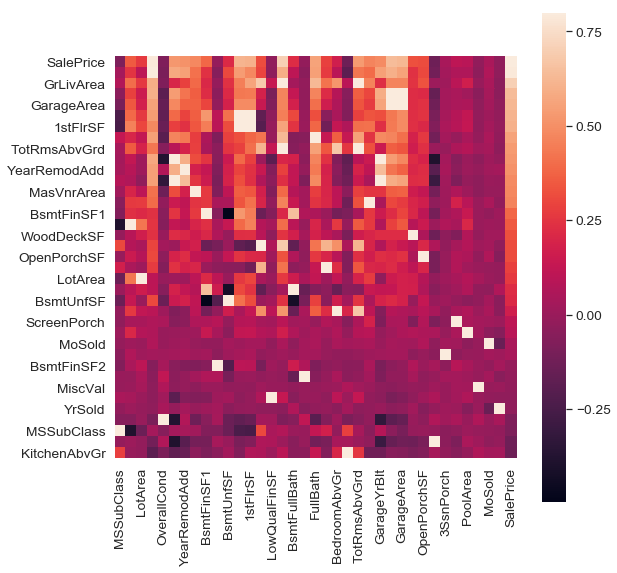

In [119]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr, vmax=.8, square=True);

# Dataset authur's recommended changes  
The author of the dataset recommends  removing any house more then 4000 sqfeet |

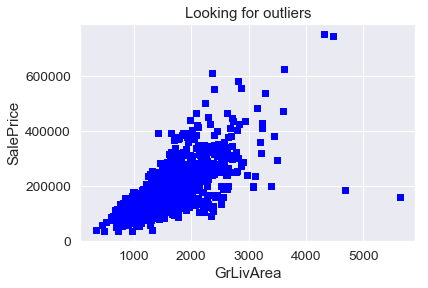

In [120]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()
train = train[train.GrLivArea < 4000]

The author of the dataset also recommends removing any house  having Garagearea more then 1200  sqfeet. |

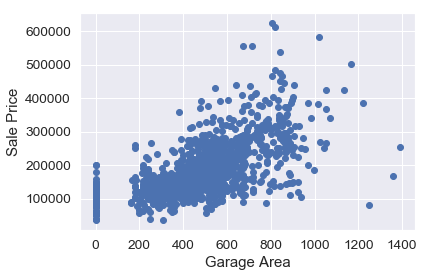

In [121]:
plt.scatter(x=train['GarageArea'], y=train["SalePrice"])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see that there many homes which don't have a garage. Here we can see a few outliers as well. Outliers can affect our regression line by pulling them further away from actual line. Now we will create a new dataframe removing those outliers. 

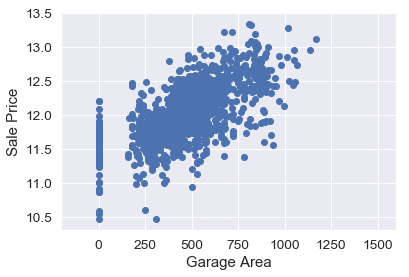

In [122]:
train = train[train['GarageArea'] < 1200]
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Saleprice more then 700000 is outliers.This can be varified from graph. Let's remove this. This is important since isolation forest will not be able to remove after we seperate the label. 

Text(0.5, 1.0, 'Outlier by SalePrice')

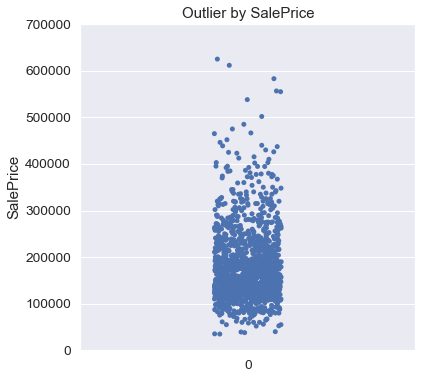

In [123]:
plt.rcParams['figure.figsize'] = [6, 6]
sns.stripplot(data=train.SalePrice, jitter=True)
plt.ylim(0,700000)
plt.ylabel("SalePrice", fontsize=15)
plt.title("Outlier by SalePrice", fontsize=15) 

In [124]:
train.drop(train[train.SalePrice > 700000].index, inplace=True) 

# Data set Concatanation

In [125]:
ntrain = train.shape[0]
ntest = test.shape[0]
train_labels_with_OT_NOLOG=train["SalePrice"].astype(np.float64)
train["SalePrice_log"] = np.log1p(train["SalePrice"]).astype(np.float64)
train_labels_with_OT=train["SalePrice_log"]
concated_dataset = pd.concat((train, test)).reset_index(drop=True)
concated_dataset.drop(['SalePrice','SalePrice_log'], axis=1, inplace=True)
nconcated=concated_dataset.shape[0]
print("Concated dataset shape",concated_dataset.shape,"train",train.shape,"test",test.shape)


Concated dataset shape (2911, 79) train (1452, 81) test (1459, 79)


Checking proper spliting

In [126]:
train_post = concated_dataset.iloc[0:1452,:]
test_post = concated_dataset.iloc[1452:2911,:]
print("train shape",train_post.shape)
print("test shape",test_post.shape)

train shape (1452, 79)
test shape (1459, 79)


In [127]:
Test=np.exp(train_labels_with_OT.values)
print(Test)

[208501. 181501. 223501. ... 266501. 142126. 147501.]


# Justifying my reason to take log of saleprice

In [128]:
#importing necessary libraries
from scipy import stats
from scipy.stats import norm

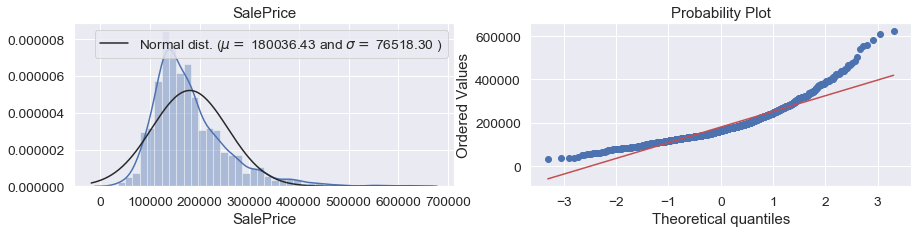

Skewness: 1.571829
Kurtosis: 3.930788


In [129]:
fig = plt.figure(figsize=(15,3))
plt.subplot(121)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.title('SalePrice')
plt.subplot(122)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

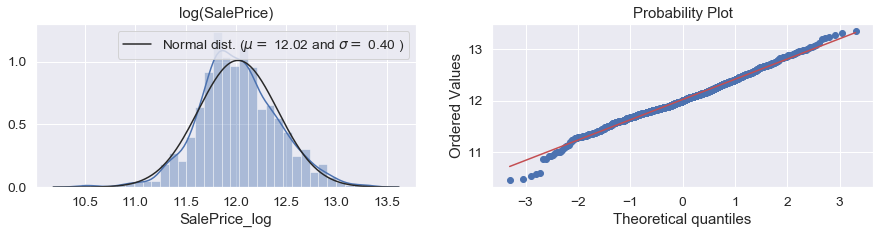

Skewness: 0.065590
Kurtosis: 0.679398


In [130]:
fig = plt.figure(figsize=(15,3))
plt.subplot(121)
sns.distplot(train_labels_with_OT , fit=norm);
(mu, sigma) = norm.fit(train_labels_with_OT)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.title('log(SalePrice)')
plt.subplot(122)
res = stats.probplot(train_labels_with_OT, plot=plt)
plt.show()
print("Skewness: %f" % train["SalePrice_log"].skew())
print("Kurtosis: %f" % train["SalePrice_log"].kurt())

The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.We will verify our assumption of skewness above as well.

# Checking for missing data and handling those

In [131]:
concated_null = (concated_dataset.isnull().sum() / len(concated_dataset)) * 100
concated_null = concated_null.drop(concated_null[concated_null == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :concated_null})
missing_data

,Missing Ratio
PoolQC,99.725180
MiscFeature,96.427345
Alley,93.198214
Fence,80.419100
FireplaceQu,48.746135
LotFrontage,16.660941
GarageQual,5.462041
GarageCond,5.462041
GarageFinish,5.462041
GarageYrBlt,5.462041


Now we will fill up the invalid or null values with valid values. We will give justification for the ways we filled later.filling this first to give beatutiful distribution representation.

In [133]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    concated_dataset[col] = concated_dataset[col].fillna(0)
concated_dataset.loc[:, "Alley"] = concated_dataset.loc[:, "Alley"].fillna("None")
concated_dataset.loc[:, "BedroomAbvGr"] = concated_dataset.loc[:, "BedroomAbvGr"].fillna(0)
concated_dataset.loc[:, "BsmtQual"] = concated_dataset.loc[:, "BsmtQual"].fillna("No")
concated_dataset.loc[:, "BsmtCond"] = concated_dataset.loc[:, "BsmtCond"].fillna("No")
concated_dataset.loc[:, "BsmtExposure"] = concated_dataset.loc[:, "BsmtExposure"].fillna("No")
concated_dataset.loc[:, "BsmtFinType1"] = concated_dataset.loc[:, "BsmtFinType1"].fillna("No")
concated_dataset.loc[:, "BsmtFinType2"] = concated_dataset.loc[:, "BsmtFinType2"].fillna("No")
concated_dataset.loc[:, "BsmtFullBath"] = concated_dataset.loc[:, "BsmtFullBath"].fillna(0)
concated_dataset.loc[:, "BsmtHalfBath"] = concated_dataset.loc[:, "BsmtHalfBath"].fillna(0)
concated_dataset.loc[:, "BsmtUnfSF"] = concated_dataset.loc[:, "BsmtUnfSF"].fillna(0)

In [134]:
concated_dataset.loc[:, "CentralAir"] = concated_dataset.loc[:, "CentralAir"].fillna("N")
concated_dataset.loc[:, "Condition1"] = concated_dataset.loc[:, "Condition1"].fillna("Norm")
concated_dataset.loc[:, "Condition2"] = concated_dataset.loc[:, "Condition2"].fillna("Norm")
concated_dataset.loc[:, "EnclosedPorch"] = concated_dataset.loc[:, "EnclosedPorch"].fillna(0)
concated_dataset.loc[:, "ExterCond"] = concated_dataset.loc[:, "ExterCond"].fillna("TA")
concated_dataset.loc[:, "ExterQual"] = concated_dataset.loc[:, "ExterQual"].fillna("TA")
concated_dataset.loc[:, "Fence"] = concated_dataset.loc[:, "Fence"].fillna("No")
concated_dataset.loc[:, "FireplaceQu"] = concated_dataset.loc[:, "FireplaceQu"].fillna("No")
concated_dataset.loc[:, "Fireplaces"] = concated_dataset.loc[:, "Fireplaces"].fillna(0)
concated_dataset.loc[:, "Functional"] = concated_dataset.loc[:, "Functional"].fillna("Typ")
concated_dataset.loc[:, "GarageType"] = concated_dataset.loc[:, "GarageType"].fillna("No")
concated_dataset.loc[:, "GarageFinish"] = concated_dataset.loc[:, "GarageFinish"].fillna("No")

In [135]:
concated_dataset.loc[:, "GarageQual"] = concated_dataset.loc[:, "GarageQual"].fillna("No")
concated_dataset.loc[:, "GarageCond"] = concated_dataset.loc[:, "GarageCond"].fillna("No")
concated_dataset.loc[:, "GarageArea"] = concated_dataset.loc[:, "GarageArea"].fillna(0)
concated_dataset.loc[:, "GarageCars"] = concated_dataset.loc[:, "GarageCars"].fillna(0)
concated_dataset.loc[:, "HalfBath"] = concated_dataset.loc[:, "HalfBath"].fillna(0)
concated_dataset.loc[:, "HeatingQC"] = concated_dataset.loc[:, "HeatingQC"].fillna("TA")
concated_dataset.loc[:, "KitchenAbvGr"] = concated_dataset.loc[:, "KitchenAbvGr"].fillna(0)
concated_dataset.loc[:, "KitchenQual"] = concated_dataset.loc[:, "KitchenQual"].fillna("TA")
concated_dataset.loc[:, "LotFrontage"] = concated_dataset.loc[:, "LotFrontage"].fillna(0)
concated_dataset.loc[:, "LotShape"] = concated_dataset.loc[:, "LotShape"].fillna("Reg")
concated_dataset.loc[:, "MasVnrType"] = concated_dataset.loc[:, "MasVnrType"].fillna("None")
concated_dataset.loc[:, "MasVnrArea"] = concated_dataset.loc[:, "MasVnrArea"].fillna(0)




In [136]:
concated_dataset.loc[:, "MiscFeature"] = concated_dataset.loc[:, "MiscFeature"].fillna("No")
concated_dataset.loc[:, "MiscVal"] = concated_dataset.loc[:, "MiscVal"].fillna(0)
concated_dataset.loc[:, "OpenPorchSF"] = concated_dataset.loc[:, "OpenPorchSF"].fillna(0)
concated_dataset.loc[:, "PavedDrive"] = concated_dataset.loc[:, "PavedDrive"].fillna("N")
concated_dataset.loc[:, "PoolQC"] = concated_dataset.loc[:, "PoolQC"].fillna("No")
concated_dataset.loc[:, "PoolArea"] = concated_dataset.loc[:, "PoolArea"].fillna(0)
concated_dataset.loc[:, "SaleCondition"] = concated_dataset.loc[:, "SaleCondition"].fillna("Normal")
concated_dataset.loc[:, "ScreenPorch"] = concated_dataset.loc[:, "ScreenPorch"].fillna(0)
concated_dataset.loc[:, "TotRmsAbvGrd"] = concated_dataset.loc[:, "TotRmsAbvGrd"].fillna(0)
concated_dataset.loc[:, "Utilities"] = concated_dataset.loc[:, "Utilities"].fillna("AllPub")
concated_dataset.loc[:, "WoodDeckSF"] = concated_dataset.loc[:, "WoodDeckSF"].fillna(0)

In [137]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
    concated_dataset[col] = concated_dataset[col].fillna(0)
concated_dataset['Exterior1st'] = concated_dataset['Exterior1st'].fillna(concated_dataset['Exterior1st'].mode()[0])
concated_dataset['Exterior2nd'] = concated_dataset['Exterior2nd'].fillna(concated_dataset['Exterior2nd'].mode()[0])
concated_dataset['SaleType'] = concated_dataset['SaleType'].fillna(concated_dataset['SaleType'].mode()[0])
concated_dataset['MSZoning'] = concated_dataset['MSZoning'].fillna(concated_dataset['MSZoning'].mode()[0])
concated_dataset['Electrical'] = concated_dataset['Electrical'].fillna(concated_dataset['Electrical'].mode()[0])

Justification for above choices is discussed below.Verify if any data is still missing.

In [138]:
concated_null = (concated_dataset.isnull().sum() / len(concated_dataset)) * 100
concated_null = concated_null.drop(concated_null[concated_null == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :concated_null})
missing_data

,Missing Ratio


Nothing  has  null 

# Visualize the distribution
before doing any thing else lets visualize the distribution. This looks good!

In [139]:
import math
color = sns.color_palette()

In [140]:
def plot_df_distributions(df, num_cols=3, columns=None):
    if columns is None:
        _columns = df.loc[:,df.dtypes != 'object'].columns.values
    else:
        _columns = columns

    n_cols = num_cols
    n_rows = math.ceil(len(_columns)/n_cols)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*3.5,n_rows*3))

    for r_idx in range(n_rows):
        for c_idx in range(n_cols):
            col_idx = r_idx*3+c_idx
            
            if col_idx < len(_columns):
                col = _columns[col_idx]
                sns.distplot(df[col], ax=axes[r_idx][c_idx], fit=norm)
    
    plt.tight_layout()
    plt.show()

In [141]:
def plot_df_countplots(df, num_cols=3, columns=None):
    if columns is None:
        _columns = df.loc[:,df.dtypes == 'object'].columns.values
    else:
        _columns = columns

    n_cols = num_cols
    n_rows = math.ceil(len(_columns)/n_cols)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*4,n_rows*3))

    for r_idx in range(n_rows):
        for c_idx in range(n_cols):
            col_idx = r_idx*3+c_idx
            if col_idx < len(_columns):
                col = _columns[col_idx]
                
                sns.countplot(df[col], ax=axes[r_idx][c_idx])
                axes[r_idx][c_idx].set_title(col)
                for item in axes[r_idx][c_idx].get_xticklabels():
                    item.set_rotation(45)
    
    plt.tight_layout()
    plt.show()

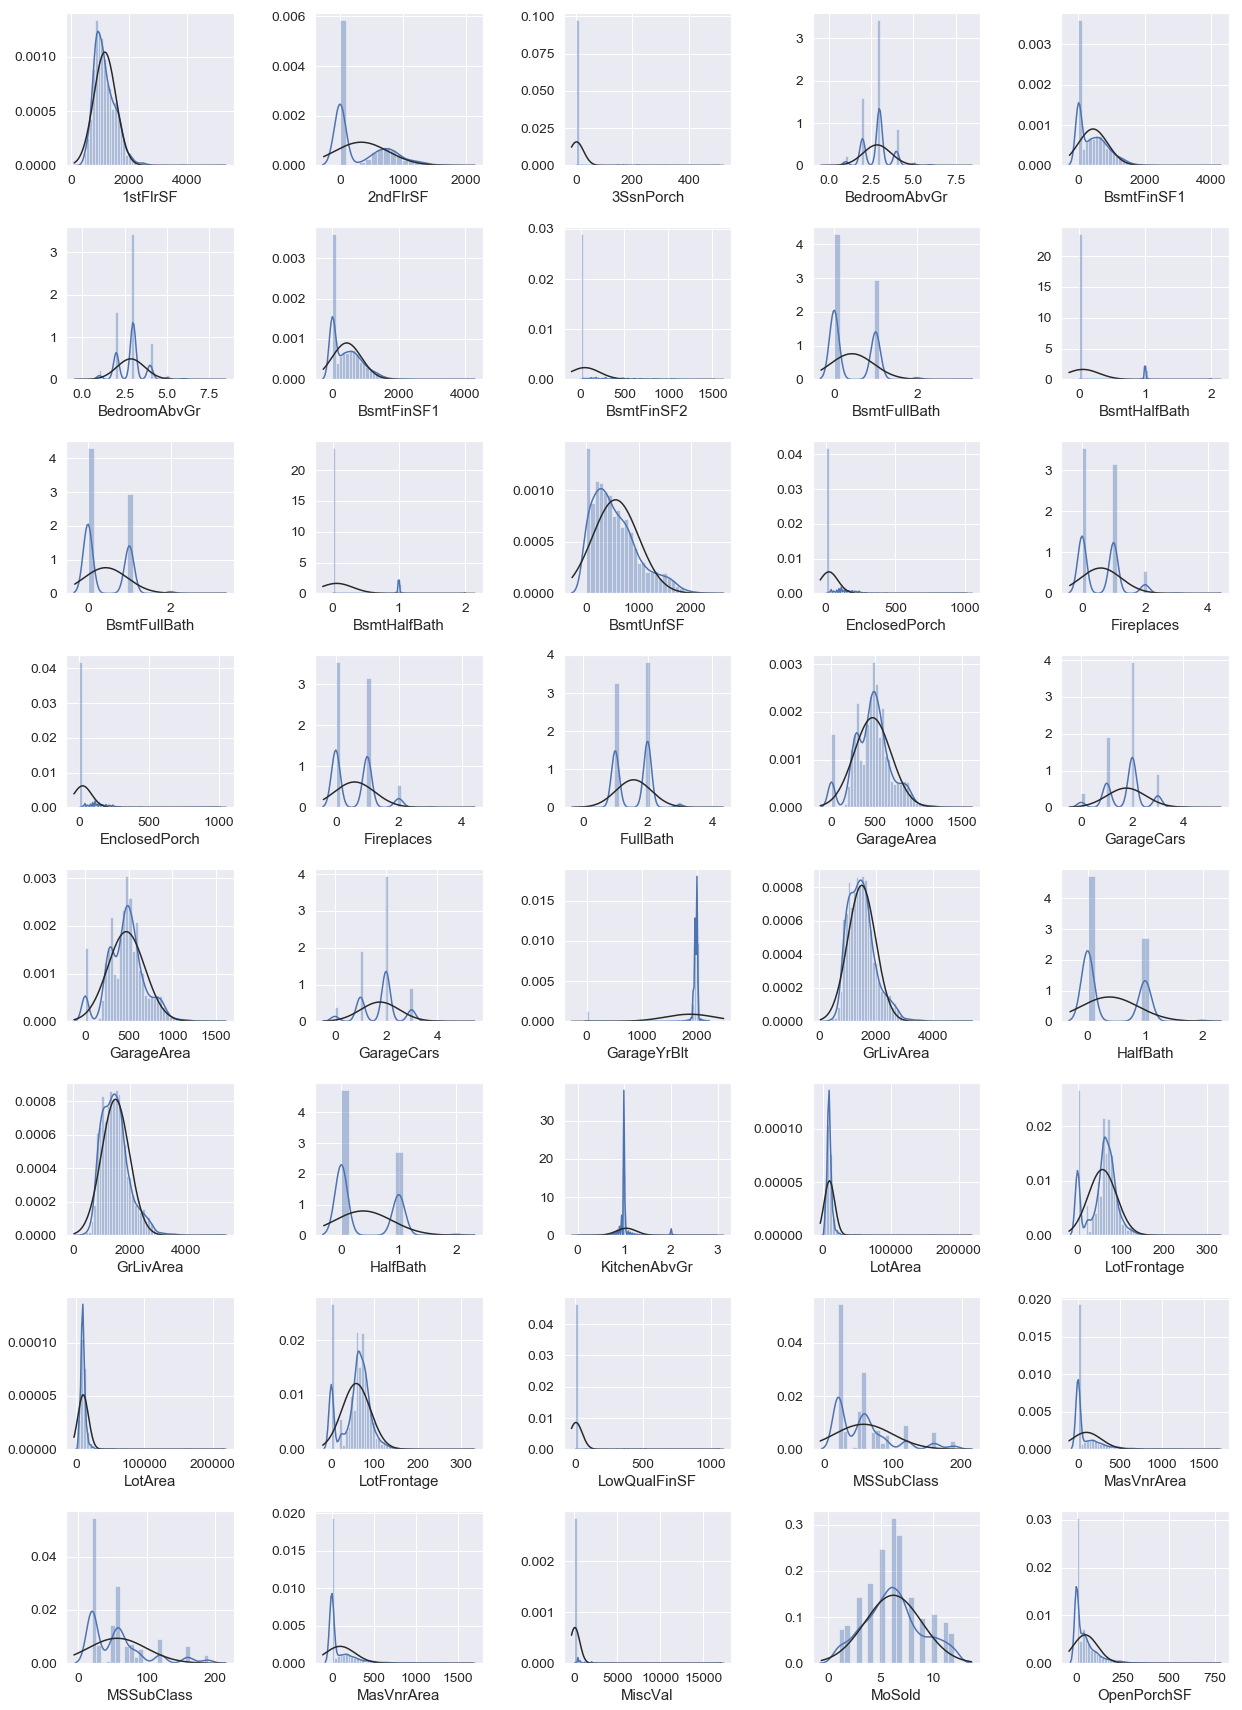

None

In [142]:
display(plot_df_distributions(concated_dataset, num_cols=5))


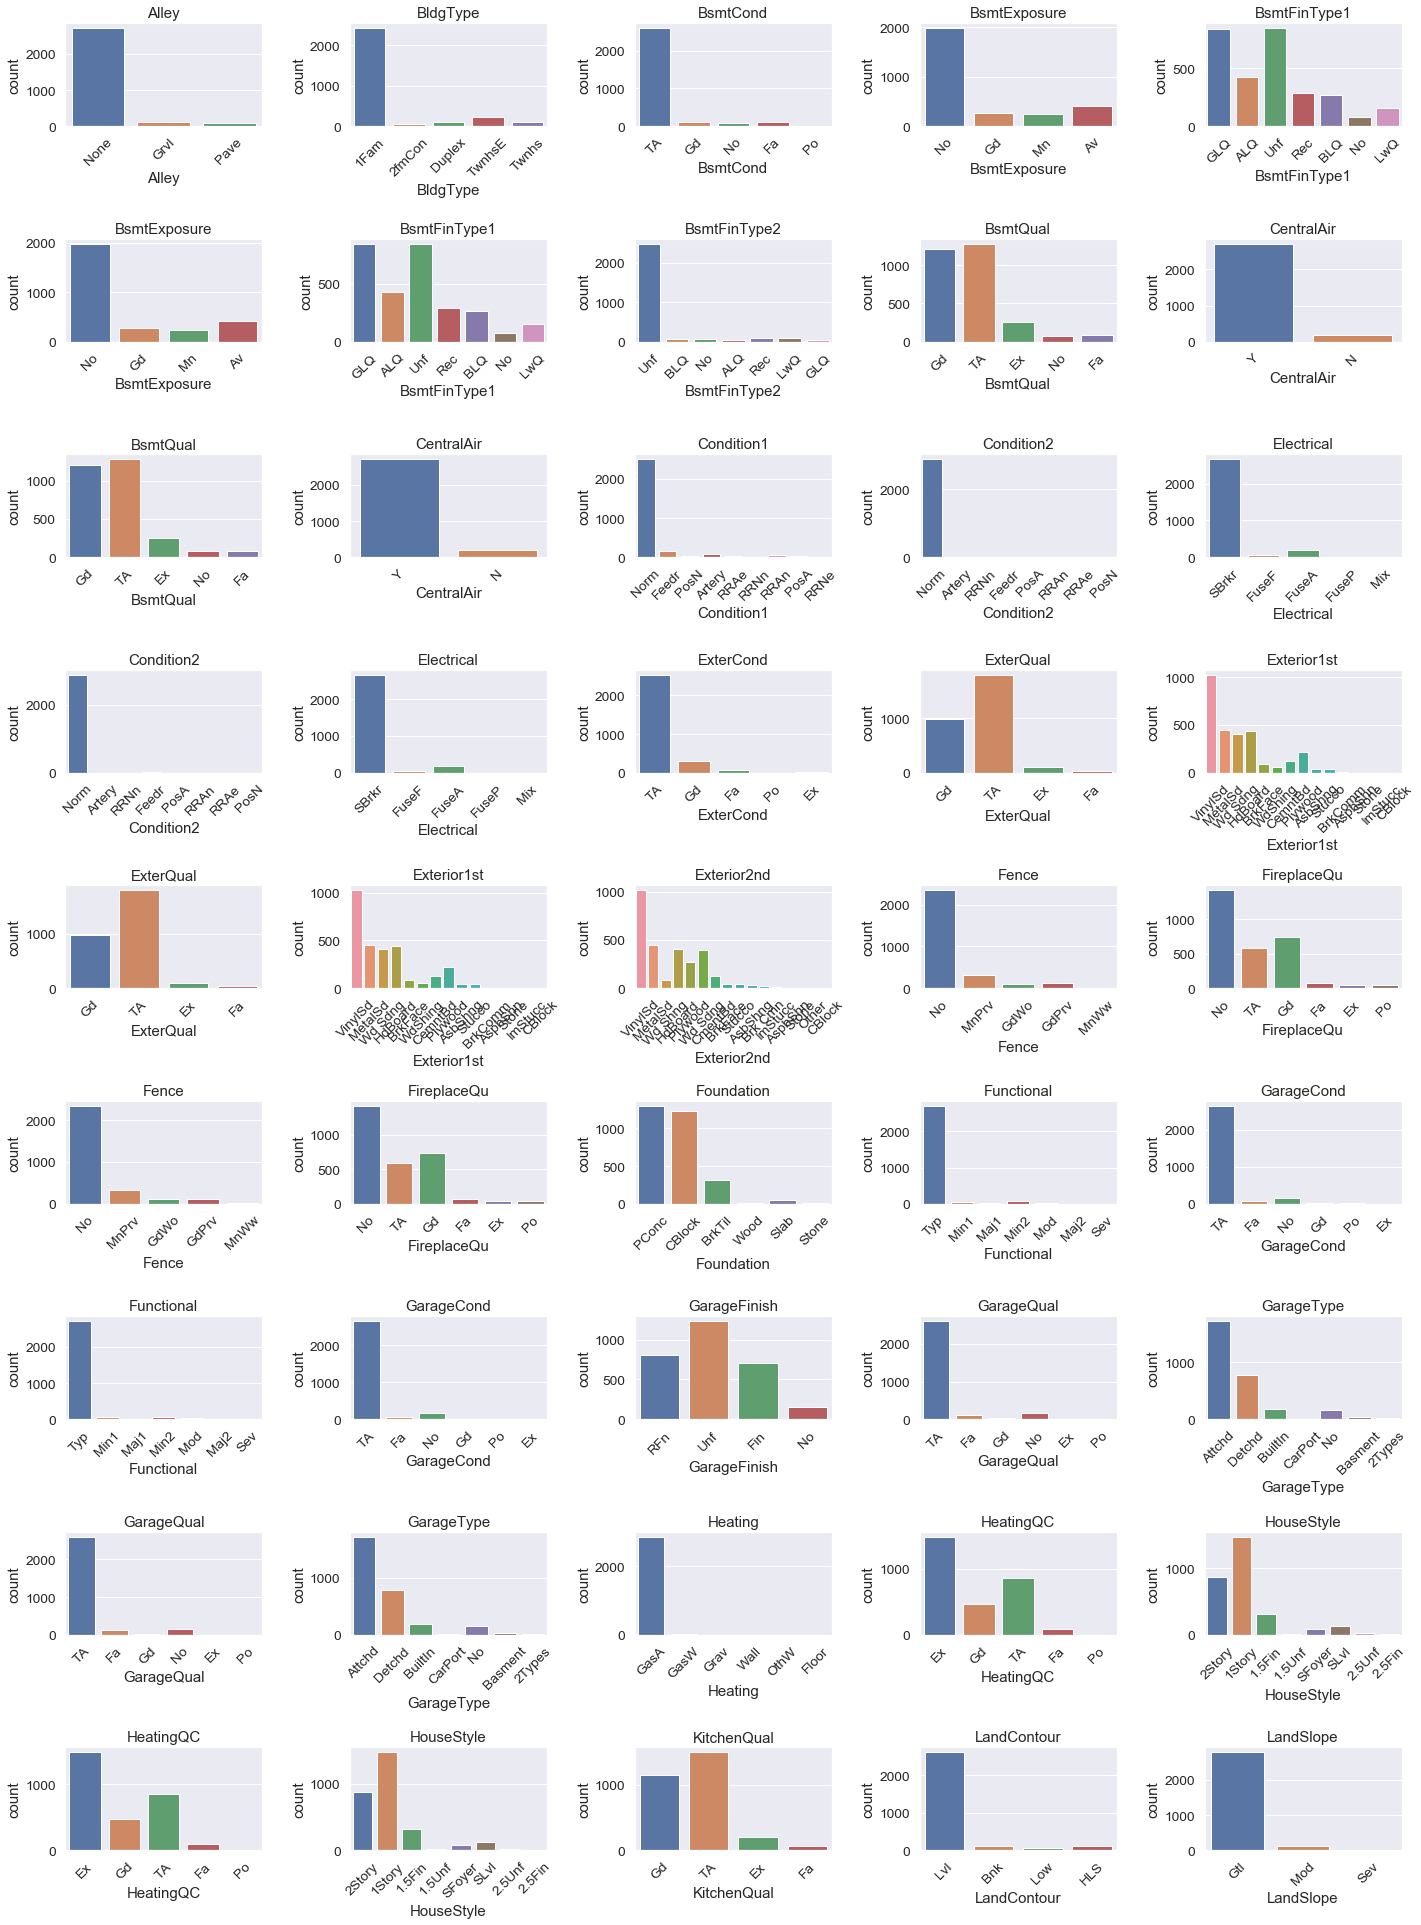

In [143]:
plot_df_countplots(concated_dataset, num_cols=5)


# Black List of feature
Some features are not balanced and badly effect the model. But we can't be sure about that right now.So let's make them black listed.If model is doing well without them we will simly drop them.

In [29]:
black_list=[]
black_list.append('Street')
black_list.append('Condition2')
black_list.append('RoofMatl')
black_list.append('Heating')
black_list.append('MiscVal')
black_list.append('Utilities')


# Add Features 
Lets add some new features. Those features are made out of prior experice on sloving that same problem.We have seen that simple applying One hot encoding and label encoding made our models performace stuck (public score=.24). So this time we will add some new features.


In [30]:
concated_dataset['TotalSF'] = concated_dataset['TotalBsmtSF'] + concated_dataset['1stFlrSF'] + concated_dataset['2ndFlrSF']


# Feature Encoding for catagorical feature 
For training through neural network our features must the in some numerical value. Since gradiantent decent algorithm (such as back propagation ) uses derivative to get optimised value of wights.Lets catagorize the the catgorical feature! Lets see if that works.

In [31]:
# Some numerical features are actually really categories
concated_dataset = concated_dataset.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [32]:
# Encode some categorical features as ordered numbers when there is information in the order
concated_dataset = concated_dataset.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [33]:
concated_dataset = concated_dataset.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

# 1.Feature  Engineering
Adding new featues showed some great improvement in accuracy

# 1.0 Simplifying Feature
We will add some simplified version of existing feature

In [34]:
concated_dataset["SimplOverallQual"] = concated_dataset.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
concated_dataset["SimplOverallCond"] = concated_dataset.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
concated_dataset["SimplPoolQC"] = concated_dataset.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
concated_dataset["SimplGarageCond"] = concated_dataset.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })



In [35]:
concated_dataset["SimplGarageQual"] = concated_dataset.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
concated_dataset["SimplFireplaceQu"] = concated_dataset.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
concated_dataset["SimplFireplaceQu"] = concated_dataset.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
concated_dataset["SimplFunctional"] = concated_dataset.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

In [36]:
concated_dataset["SimplKitchenQual"] = concated_dataset.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
concated_dataset["SimplHeatingQC"] = concated_dataset.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
concated_dataset["SimplBsmtFinType1"] = concated_dataset.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
concated_dataset["SimplBsmtFinType2"] = concated_dataset.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })


In [37]:
concated_dataset["SimplBsmtCond"] = concated_dataset.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
concated_dataset["SimplBsmtQual"] = concated_dataset.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
concated_dataset["SimplExterCond"] = concated_dataset.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
concated_dataset["SimplExterQual"] = concated_dataset.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


# 1.1 Combine Existing Feature to construct new features
We will create and append some new feature. Those are creating from the existaing feature.

In [38]:
concated_dataset["OverallGrade"] = concated_dataset["OverallQual"] * concated_dataset["OverallCond"]
# Overall quality of the garage
concated_dataset["GarageGrade"] = concated_dataset["GarageQual"] * concated_dataset["GarageCond"]
# Overall quality of the exterior
concated_dataset["ExterGrade"] = concated_dataset["ExterQual"] * concated_dataset["ExterCond"]
# Overall kitchen score
concated_dataset["KitchenScore"] = concated_dataset["KitchenAbvGr"] * concated_dataset["KitchenQual"]
# Overall fireplace score
concated_dataset["FireplaceScore"] = concated_dataset["Fireplaces"] * concated_dataset["FireplaceQu"]
# Overall garage score
concated_dataset["GarageScore"] = concated_dataset["GarageArea"] * concated_dataset["GarageQual"]
# Overall pool score
concated_dataset["PoolScore"] = concated_dataset["PoolArea"] * concated_dataset["PoolQC"]
# Simplified overall quality of the house
concated_dataset["SimplOverallGrade"] = concated_dataset["SimplOverallQual"] * concated_dataset["SimplOverallCond"]
# Simplified overall quality of the exterior
concated_dataset["SimplExterGrade"] = concated_dataset["SimplExterQual"] * concated_dataset["SimplExterCond"]
# Simplified overall pool score


In [39]:
concated_dataset["SimplPoolScore"] = concated_dataset["PoolArea"] * concated_dataset["SimplPoolQC"]
# Simplified overall garage score
concated_dataset["SimplGarageScore"] = concated_dataset["GarageArea"] * concated_dataset["SimplGarageQual"]
# Simplified overall fireplace score
concated_dataset["SimplFireplaceScore"] = concated_dataset["Fireplaces"] * concated_dataset["SimplFireplaceQu"]
# Simplified overall kitchen score
concated_dataset["SimplKitchenScore"] = concated_dataset["KitchenAbvGr"] * concated_dataset["SimplKitchenQual"]
# Total number of bathrooms
concated_dataset["TotalBath"] = concated_dataset["BsmtFullBath"] + (0.5 * concated_dataset["BsmtHalfBath"]) + \
concated_dataset["FullBath"] + (0.5 * concated_dataset["HalfBath"])
# Total SF for house (incl. basement)


In [40]:
concated_dataset["AllSF"] = concated_dataset["GrLivArea"] + concated_dataset["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
concated_dataset["AllFlrsSF"] = concated_dataset["1stFlrSF"] + concated_dataset["2ndFlrSF"]
# Total SF for porch
concated_dataset["AllPorchSF"] = concated_dataset["OpenPorchSF"] + concated_dataset["EnclosedPorch"] + \
concated_dataset["3SsnPorch"] + concated_dataset["ScreenPorch"]
# Has masonry veneer or not
concated_dataset["HasMasVnr"] = concated_dataset.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
concated_dataset["BoughtOffPlan"] = concated_dataset.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

# 1.2 Double simpling
Now we will find the features which has most impact on target

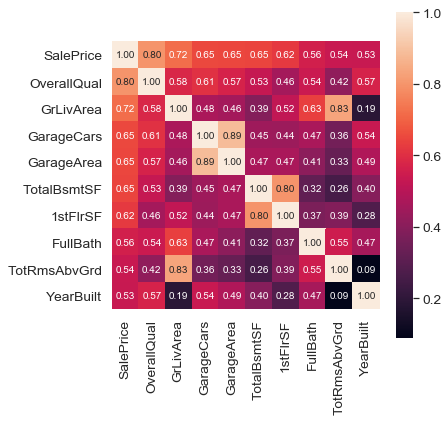

In [41]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [42]:
concated_dataset["OverallQual-s2"] = concated_dataset["OverallQual"] ** 2
concated_dataset["OverallQual-s3"] = concated_dataset["OverallQual"] ** 3
concated_dataset["OverallQual-Sq"] = np.sqrt(concated_dataset["OverallQual"])
concated_dataset["AllSF-2"] = concated_dataset["AllSF"] ** 2
concated_dataset["AllSF-3"] = concated_dataset["AllSF"] ** 3
concated_dataset["AllSF-Sq"] = np.sqrt(concated_dataset["AllSF"])
concated_dataset["AllFlrsSF-2"] = concated_dataset["AllFlrsSF"] ** 2
concated_dataset["AllFlrsSF-3"] = concated_dataset["AllFlrsSF"] ** 3
concated_dataset["AllFlrsSF-Sq"] = np.sqrt(concated_dataset["AllFlrsSF"])
concated_dataset["GrLivArea-2"] = concated_dataset["GrLivArea"] ** 2


In [43]:
concated_dataset["GrLivArea-3"] = concated_dataset["GrLivArea"] ** 3
concated_dataset["GrLivArea-Sq"] = np.sqrt(concated_dataset["GrLivArea"])
concated_dataset["SimplOverallQual-s2"] = concated_dataset["SimplOverallQual"] ** 2
concated_dataset["SimplOverallQual-s3"] = concated_dataset["SimplOverallQual"] ** 3
concated_dataset["SimplOverallQual-Sq"] = np.sqrt(concated_dataset["SimplOverallQual"])
concated_dataset["ExterQual-2"] = concated_dataset["ExterQual"] ** 2
concated_dataset["ExterQual-3"] = concated_dataset["ExterQual"] ** 3
concated_dataset["ExterQual-Sq"] = np.sqrt(concated_dataset["ExterQual"])
concated_dataset["GarageCars-2"] = concated_dataset["GarageCars"] ** 2
concated_dataset["GarageCars-3"] = concated_dataset["GarageCars"] ** 3
concated_dataset["GarageCars-Sq"] = np.sqrt(concated_dataset["GarageCars"])


In [44]:
concated_dataset["TotalBath-2"] = concated_dataset["TotalBath"] ** 2
concated_dataset["TotalBath-3"] = concated_dataset["TotalBath"] ** 3
concated_dataset["TotalBath-Sq"] = np.sqrt(concated_dataset["TotalBath"])
concated_dataset["KitchenQual-2"] = concated_dataset["KitchenQual"] ** 2
concated_dataset["KitchenQual-3"] = concated_dataset["KitchenQual"] ** 3
concated_dataset["KitchenQual-Sq"] = np.sqrt(concated_dataset["KitchenQual"])
concated_dataset["GarageScore-2"] = concated_dataset["GarageScore"] ** 2
concated_dataset["GarageScore-3"] = concated_dataset["GarageScore"] ** 3
concated_dataset["GarageScore-Sq"] = np.sqrt(concated_dataset["GarageScore"])

# Feature type Analysis

In [45]:
categorical_features = concated_dataset.select_dtypes(include = ["object"]).columns
numerical_features = concated_dataset.select_dtypes(exclude = ["object"]).columns
print(categorical_features)
print(numerical_features)


Index(['Alley', 'BldgType', 'BsmtCond', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence',
       'Foundation', 'GarageFinish', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType'],
      dtype='object')
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFullBath',
       ...
       'GarageCars-Sq', 'TotalBath-2', 'TotalBath-3', 'TotalBath-Sq',
       'KitchenQual-2', 'KitchenQual-3', 'KitchenQual-Sq', 'GarageScore-2',
       'GarageScore-3', 'GarageScore-Sq'],
      dtype='object', length=117)


In [46]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
Numerical_feature=numerical_features.values
print(Numerical_feature)

Numerical features : 117
Categorical features : 27
['1stFlrSF' '2ndFlrSF' '3SsnPorch' 'BedroomAbvGr' 'BsmtExposure'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtFinType1' 'BsmtFinType2' 'BsmtFullBath'
 'BsmtHalfBath' 'BsmtQual' 'BsmtUnfSF' 'EnclosedPorch' 'ExterCond'
 'ExterQual' 'FireplaceQu' 'Fireplaces' 'FullBath' 'Functional'
 'GarageArea' 'GarageCars' 'GarageCond' 'GarageQual' 'GarageYrBlt'
 'GrLivArea' 'HalfBath' 'HeatingQC' 'KitchenAbvGr' 'KitchenQual'
 'LandSlope' 'LotArea' 'LotFrontage' 'LotShape' 'LowQualFinSF'
 'MasVnrArea' 'MiscVal' 'OpenPorchSF' 'OverallCond' 'OverallQual'
 'PavedDrive' 'PoolArea' 'PoolQC' 'ScreenPorch' 'Street' 'TotRmsAbvGrd'
 'TotalBsmtSF' 'Utilities' 'WoodDeckSF' 'YearBuilt' 'YearRemodAdd'
 'YrSold' 'TotalSF' 'SimplOverallQual' 'SimplOverallCond' 'SimplPoolQC'
 'SimplGarageCond' 'SimplGarageQual' 'SimplFireplaceQu' 'SimplFunctional'
 'SimplKitchenQual' 'SimplHeatingQC' 'SimplBsmtFinType1'
 'SimplBsmtFinType2' 'SimplBsmtCond' 'SimplBsmtQual' 'SimplExterCond'
 'SimplE

In [47]:
concated_dataset_num = concated_dataset[numerical_features]
concated_dataset_cat = concated_dataset[categorical_features]


We created some new features. Those might be sparse. So filling those up. 

In [48]:
print("NAs for numerical features in train : " + str(concated_dataset_num.isnull().values.sum()))
concated_dataset_num = concated_dataset_num.fillna(concated_dataset_num.median())
print("Remaining NAs for numerical features in train : " + str(concated_dataset_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [49]:
concated_null = (concated_dataset.isnull().sum() / len(concated_dataset)) * 100
concated_null = concated_null.drop(concated_null[concated_null == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :concated_null})
missing_data

,Missing Ratio


# Explaination for  choices for missing data handling and label encoding
choices for fiiling missing data and replacement. This part is for illustration and explaination.So code are commented as they are coded previously .

From the list we can begin working with data filling.First let check what is PoolQC and why this is empthy.This have four values Ex=Excellent,Gd=Good,TA=typical,Fa=Fair,NA=no pool.So may be missing data should be NA.Lets also help our model by just replacing with neumerical values I will give Ex=4 and No Pool=0. Since the saleprice should be higher if the PoolQC is more.

Now this looks good. Now we can investigate next feature. Which MiscFeature is 96% missing data.This has Elev {Elevator}, Gar2 {2nd Garage} ,Othr {Other},Shed {Shed (over 100 SF}TenC {Tennis Court},NA   {None} values.But we can but keep NA lets replace. We also need to make it catagorical at some point.This feature is also black listed.

Now lets fill up Alley.This can be of 3 types Gravel, paved and No Alley which means NA will have different meaning.We will one hot encode that.

Lets encode time like feature.Well we should one hot encode those but lets's see how it helps if we let it behave like neumerical feature 

Now lets find out how to encode fireplace. From the descreption Ex Excellent - Exceptional Masonry Fireplace Gd Good - Masonry Fireplace in main level TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement Fa Fair - Prefabricated Fireplace in basement Po Poor - Ben Franklin Stove NA No Fireplace So we can replace Ex with 5 and NA with 0.

LotFrontage: Linear feet of street connected to property.NA probably means not given. LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

GarageType, GarageFinish, GarageQual, GarageCond is NA if no Garage is there. NA should be replaced with None.I will fill up maually.

Lets's keep a list of things we can't decide where it is ranked or not.


In [50]:
Undecided_ranked=[]
Undecided_unranked=[]
Undecided_unranked.append("Functional")
Undecided_unranked.append("Alley")
Undecided_unranked.append("BsmtFin1")
Undecided_unranked.append("Bsmtfin2")
Undecided_ranked.append("Fence")

In [51]:
Undecided_ranked.append("PavedDrive")

In [52]:
Undecided_ranked.append("LandSlope")
Undecided_ranked.append("LotShape")

Adding simplified version of existing feature.

Let's take unorder catagorical data to str. So that we can use pd dummy to one hot encode. 

# Search for skewness
Neural network works best when it distribution is taken from normal distribution. Skewness is asymmetry in a statistical distribution, in which the curve appears distorted or skewed either to the left or to the right. Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.

In [53]:
from scipy.stats import skew
feature_skewness = concated_dataset[Numerical_feature].apply(lambda x: skew(x.dropna()))
feature_skewness = feature_skewness.sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' : feature_skewness})
skewness.head(10)

,Skew
PoolScore,24.500731
SimplPoolScore,24.410348
MiscVal,21.926841
PoolQC,21.891199
SimplPoolQC,20.274742
PoolArea,18.688884
AllSF-3,17.917674
LotArea,13.176757
LowQualFinSF,12.071863
3SsnPorch,11.360117


In [54]:
high_skewed_features = skewness.loc[abs(skewness.Skew) >= 0.5].index.values


In [55]:
#plot_df_distributions(concated_dataset, columns=high_skewed_features)

# Fixing skewness with Boxcox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a test which works well in normal distribution. Such as Neural netork regressors.

In [56]:
from scipy.special import boxcox1p

lam = 0.15
for feat in high_skewed_features:
    concated_dataset[feat] = boxcox1p(concated_dataset[feat], lam)
    


In [57]:
concated_dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,11.692623,11.686189,0.0,None,3,1Fam,3,0.000000,11.170327,0.0,...,0.942290,3.156265,5.088839,1.870829,3.530419,5.802739,2.000000,54.805612,179.999048,4.993065
1,12.792276,0.000000,0.0,None,3,1Fam,3,1.540963,12.062832,0.0,...,0.942290,2.306783,3.496358,1.581139,2.750250,4.322948,1.732051,51.660718,165.859245,4.844785
2,11.892039,11.724598,0.0,None,3,1Fam,3,0.730463,10.200343,0.0,...,0.942290,3.156265,5.088839,1.870829,3.530419,5.802739,2.000000,56.751869,188.933813,5.082129
3,12.013683,11.354094,0.0,None,3,1Fam,4,0.000000,8.274266,0.0,...,1.084767,1.820334,2.602594,1.414214,3.530419,5.802739,2.000000,57.795611,193.782414,5.129087
4,12.510588,12.271365,0.0,None,4,1Fam,3,1.194318,10.971129,0.0,...,1.084767,3.156265,5.088839,1.870829,3.530419,5.802739,2.000000,63.109485,219.072091,5.360028


In [58]:
# plot_df_distributions(concated_dataset, columns=Numerical_feature)

Either or both of teh scaller is used. Keeping both so that I can experiment later.

# Scalling with Standard Scaler
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:
$\frac{x_i-mean(x)}{stdv(x)}$

In [59]:
from sklearn.preprocessing import StandardScaler
Std_nummerical = StandardScaler()
Std_nummerical.fit(concated_dataset[Numerical_feature])
concated_dataset[Numerical_feature] = Std_nummerical.transform(concated_dataset[Numerical_feature])

In [60]:
type(concated_dataset)

pandas.core.frame.DataFrame

In [61]:
concated_dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,-0.785209,1.215787,-0.112469,None,0.170340,1Fam,3,-0.652944,0.803472,-0.358575,...,0.374960,1.525033,1.552536,1.486001,0.778934,0.774619,0.773356,0.414248,0.428145,0.358802
1,0.413604,-0.860017,-0.112469,None,0.170340,1Fam,3,2.031925,0.977848,-0.358575,...,0.374960,0.420710,0.407097,0.430591,-0.760142,-0.762110,-0.759444,0.184613,0.139553,0.230057
2,-0.567811,1.222609,-0.112469,None,0.170340,1Fam,3,0.619766,0.613958,-0.358575,...,0.374960,1.525033,1.552536,1.486001,0.778934,0.774619,0.773356,0.556360,0.610502,0.436133
3,-0.435198,1.156797,-0.112469,None,0.170340,1Fam,4,-0.652944,0.237644,-0.358575,...,0.980773,-0.211672,-0.235769,-0.177557,0.778934,0.774619,0.773356,0.632572,0.709461,0.476905
4,0.106515,1.319731,-0.112469,None,1.385681,1Fam,3,1.427954,0.764553,-0.358575,...,0.980773,1.525033,1.552536,1.486001,0.778934,0.774619,0.773356,1.020581,1.225620,0.677422


# Minmax Scaling
Minmax normalization is a normalization strategy which linearly transforms x to y= (x-min)/(max-min), where min and max are the minimum and maximum values in X, where X is the set of observed values of x. 

In [62]:
#from sklearn.preprocessing import MinMaxScaler

#features_to_scale = Numerical_feature + Time_feature + Ranked_feature
#numeric_scaler = MinMaxScaler()
#numeric_scaler.fit(concated_dataset[features_to_scale])
#3concated_dataset[features_to_scale] = numeric_scaler.transform(concated_dataset[features_to_scale])

# Preparing for One Hot encoding
In order to make unordered catagories represented in one hot encoding with pandas dummies we have to make the feature object type first. This one is for flexiblity optional usage.

In [63]:
#for col in Unranked_feature:
#    concated_dataset[col] = concated_dataset[col].astype(str)
#concated_dataset[Unranked_feature].head(5)


# Removing Black listed features
This is experimental if it this does not help the model. We will undo that.

In [64]:
#concated_dataset = concated_dataset.drop(black_list, axis=1)


In [65]:
concated_dataset.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq
0,-0.785209,1.215787,-0.112469,None,0.170340,1Fam,3,-0.652944,0.803472,-0.358575,...,0.374960,1.525033,1.552536,1.486001,0.778934,0.774619,0.773356,0.414248,0.428145,0.358802
1,0.413604,-0.860017,-0.112469,None,0.170340,1Fam,3,2.031925,0.977848,-0.358575,...,0.374960,0.420710,0.407097,0.430591,-0.760142,-0.762110,-0.759444,0.184613,0.139553,0.230057
2,-0.567811,1.222609,-0.112469,None,0.170340,1Fam,3,0.619766,0.613958,-0.358575,...,0.374960,1.525033,1.552536,1.486001,0.778934,0.774619,0.773356,0.556360,0.610502,0.436133
3,-0.435198,1.156797,-0.112469,None,0.170340,1Fam,4,-0.652944,0.237644,-0.358575,...,0.980773,-0.211672,-0.235769,-0.177557,0.778934,0.774619,0.773356,0.632572,0.709461,0.476905
4,0.106515,1.319731,-0.112469,None,1.385681,1Fam,3,1.427954,0.764553,-0.358575,...,0.980773,1.525033,1.552536,1.486001,0.778934,0.774619,0.773356,1.020581,1.225620,0.677422


# One hot encoding
by Pandas dummy variable

In [66]:

concated_dataset_D = pd.get_dummies(concated_dataset)


In [67]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(concated_dataset_D)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,SimplOverallQual,SimplOverallCond,SimplPoolQC,SimplGarageCond,SimplGarageQual,SimplFireplaceQu,SimplFunctional,SimplKitchenQual,SimplHeatingQC,SimplBsmtFinType1,SimplBsmtFinType2,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual,OverallGrade,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,GarageScore,PoolScore,SimplOverallGrade,SimplExterGrade,SimplPoolScore,SimplGarageScore,SimplFireplaceScore,SimplKitchenScore,TotalBath,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan,OverallQual-s2,OverallQual-s3,OverallQual-Sq,AllSF-2,AllSF-3,AllSF-Sq,AllFlrsSF-2,AllFlrsSF-3,AllFlrsSF-Sq,GrLivArea-2,GrLivArea-3,GrLivArea-Sq,SimplOverallQual-s2,SimplOverallQual-s3,SimplOverallQual-Sq,ExterQual-2,ExterQual-3,ExterQual-Sq,GarageCars-2,GarageCars-3,GarageCars-Sq,TotalBath-2,TotalBath-3,TotalBath-Sq,KitchenQual-2,KitchenQual-3,KitchenQual-Sq,GarageScore-2,GarageScore-3,GarageScore-Sq,Alley_1,Alley_2,Alley_None,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageFinish_Fin,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSSubClass_SC120,MSSubClass_SC150,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,MSSubClass_SC70,MSSubClass_SC75,MSSubClass_SC80,MSSubClass_SC85,MSSubClass_SC90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_No,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Apr,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_

In [68]:
concated_dataset_D.select_dtypes(include=['object']).columns

Index([], dtype='object')

# Splitting Data back to Train and Test set

In [69]:
train_postprocess = concated_dataset_D.iloc[0:1452,:]
test_postprocess = concated_dataset_D.iloc[1452:2911,:]
print("train shape",train_postprocess.shape)
print("test shape",test_postprocess.shape)

train shape (1452, 325)
test shape (1459, 325)


# Removing Out layers
We will use simple isolation Forest to remove outlayers.In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using  random partitioning like in isolation tree or any decession tree, they should be identified closer to the root of the tree (shorter average path length) with fewer splits necessary.

In [70]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(max_samples=100, random_state=42)
isolation_forest.fit(train_postprocess)

outlier_info = pd.DataFrame(isolation_forest.predict(train_postprocess), columns=['Top'])

no_outlier_idxs = outlier_info[outlier_info['Top'] == 1].index.values
outlier_idxs = outlier_info[outlier_info['Top'] == -1].index.values
train_postprocess_without_OT = train_postprocess.iloc[no_outlier_idxs]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [71]:
train_labels_without_OT = train_labels_with_OT.iloc[no_outlier_idxs]
train_labels_with_OT_NOLOG=train_labels_with_OT_NOLOG.iloc[no_outlier_idxs]
print('Number of outliers: {}'.format(outlier_idxs.shape[0]))
print('Shape train dataset after removal: {}'.format(train_postprocess_without_OT.shape[0]))
print('Shape train dataset labes after removal: {}'.format(train_labels_without_OT.shape[0]))

Number of outliers: 146
Shape train dataset after removal: 1306
Shape train dataset labes after removal: 1306


# Combining again for PCA

In [72]:
ntrainp = train_postprocess_without_OT.shape[0]
ntestp = test_postprocess.shape[0]
concated_dataset_DR = pd.concat((train_postprocess_without_OT, test_postprocess)).reset_index(drop=True)
concated_dataset_DR.shape

(2765, 325)

# Dimenstinality Reduction
Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. This problem is often referred to as the curse of dimensionality. Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse. It also makes your pipelines a bit more complex and thus harder to maintain. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training).


# Principle Component Analysis
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. 

In [73]:
from sklearn.decomposition import KernelPCA,PCA
pca=PCA(n_components=0.98)
concated_dataset_reduced=pca.fit_transform(concated_dataset_DR)

In [74]:
concated_dataset_reduced.shape

(2765, 94)

# Manifold Learning 
Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed
<br />
The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold.However, this assumption does not always hold. <br />
if you reduce the dimensionality of your training set before training a model, it will definitely speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset. 

# Locally Linear Embedding (LLE)
Locally Linear Embedding (LLE)is another very powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections like the previous algorithms. In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved (more details shortly). This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.How ever for our problem we used it and the result was horrible.

In [75]:
#from sklearn.manifold import LocallyLinearEmbedding
#lle = LocallyLinearEmbedding(n_components=0.99, n_neighbors=10)
#concated_dataset_reduced = lle.fit_transform(concated_dataset_DR)


In [76]:
train_postprocess = concated_dataset_reduced[0:1306]
test_postprocess = concated_dataset_reduced[1306:2769]

# 0. Processing data for feeding Neural Network
Usually float32 formated data is feed to neural network so that it can calculate small numbers without any round off or truncation error.  

In [77]:
x_train = train_postprocess.astype(np.float64)
x_train.shape

(1306, 94)

In [78]:
y_train = train_labels_without_OT.values
y_train.shape

(1306,)

In [79]:
Test=np.expm1(y_train)
print(Test)

[208500. 181500. 223500. ... 210000. 142125. 147500.]


In [80]:
x_test = test_postprocess.astype(np.float64)
x_test.shape


(1459, 94)

# 1.1 Splitting Training set to valid-train set 
To understand how our model is doing we must have some validation set. We will check performance on every 100 epoch on validation set. We have also implemented early stoping.Uff!! We took 25% validation set.

In [81]:
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_train, y_train, test_size=0.2, random_state=200)

1.2 keeping some important shapes in variables for ease of use

In [189]:
m_train,n_train=X_train_val.shape
m_val,n_val=X_test_val.shape
m_test,n_test=x_test.shape

# Importing Libraries 
We imported data time to save check points

In [190]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)
import tensorflow as tf
from datetime import datetime


In [191]:
# TO AVOID WATCHING WARNINGS FOR TENSORFLOW 
import logging 
def keep_every_nth_info(n): 
    i = -1  
    def filter_record(record):
        nonlocal i      
        i += 1        
        return int( i % n == 15)   
    return filter_record 
logging.getLogger('tensorflow').addFilter(keep_every_nth_info(15))
zero = 0 

# Final Model

We added the bias to the input 

In [192]:
#scalling and adding bias

scaled_x_train_plus_bias = np.c_[np.ones((m_train, 1)),X_train_val]
scaled_x_val_plus_bias = np.c_[np.ones((m_val, 1)),X_test_val]
scaled_x_test_plus_bias = np.c_[np.ones((m_test, 1)),x_test]


In [193]:
# hidden layers neuron numbers, batchsize and epoch number
tf.reset_default_graph()

n_inputs = n_train
n_hidden1 = 32
n_hidden2 = 16
n_hidden3=8
n_hidden4=4
n_hidden5=2
n_hidden6=0
n_outputs = 1
n_epochs = 5000 
batch_size = 32


 # Learning rate scheduling (Exponential scheduling) 
Finding a good learning rate can be tricky. If you set it way too high, training may actually diverge . If we set it too low, training will eventually converge to the optimum, but it will take a very long time. If we set it slightly too high, it will make progress very quickly at first, but it will end up dancing around the optimum, never settling down (unless you use an adaptive learning rate optimization algorithm such as AdaGrad, RMSProp, or Adam, but even then it may take time to settle). We may be able to find a fairly good learning rate by training your network several times during just a few epochs using various learning rates and comparing the learning curves. The ideal learning rate will learn quickly and converge to good solution. However, We can do better than a constant learning rate: if we start with a high learning rate and then reduce it once it stops making fast progress, we can reach a good solution faster than with the optimal constant learning rate. There are many different strategies to reduce the learning rate during training. These strategies are called learning schedules. we have used exponantial learning scheduling.<br />
Exponential scheduling:<br />
Set the learning rate to a function of the iteration number t: $η(t) = η_0* 10^{(–t/r)}$. This works great, but it requires tuning $η_0$ and r. The learning rate will drop by a factor of 10 every r steps. 

In [194]:
#Learning rate with schedular
initial_learning_rate = 0.1
decay_steps = 10000
decay_rate = 1/10
global_step = tf.Variable(0, trainable=False, name="global_step")
learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step, decay_steps, decay_rate)

In [195]:
#Place holder initiallizations
X = tf.placeholder(tf.float64,shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.float64,shape=(None), name="y")

# Dropout
The most popular regularization technique for deep neural networks is arguably dropout. It was proposed by G. E. Hinton in 2012 and further detailed in a paper21 by Nitish Srivastava et al., and it has proven to be highly successful: even the state-ofthe-art neural networks got a 1–2% accuracy boost simply by adding dropout. This may not sound like a lot, but when a model already has 95% accuracy, getting a 2% accuracy boost means dropping the error rate by almost 40% (going from 5% error to roughly 3%). It is a fairly simple algorithm: at every training step, every neuron (including the input neurons but excluding the output neurons) has a probability p of being temporarily “dropped out,” meaning it will be entirely ignored during this training step, but it may be active during the next step . The hyperparameter p is called the dropout rate, and it is typically set to 50%. After training, neurons don’t get dropped anymore.


In [196]:
#Drop out initializations ,tunable per layer wise 
training = tf.placeholder_with_default(False, shape=(), name='training')
dropout_rate_X = 0.1
dropout_rate_1=0.2
dropout_rate_2=0.2
dropout_rate_3=0.1
dropout_rate_4=0.1
dropout_rate_5=0.1
dropout_rate_6=0.0
X_drop = tf.layers.dropout(X, dropout_rate_X, training=training)
he_init = tf.variance_scaling_initializer()

# Max norm regularization
consists in clipping each neuron's weight vector after each training step to ensure that its norm never exceeds some threshold. <br />
for each neuron, it constrains the weights w of the incoming connections such that $∥ w ∥_2 \leqq r$, where r is the max-norm hyperparameter and $∥ · ∥_2$ is the $ℓ_2$ norm. We typically implement this constraint by computing $∥w∥_2$ after each training step and clipping w if needed $(w\leftarrow \frac{r}{||w||_2}   )$. Reducing r increases the amount of regularization and helps reduce overfitting. Maxnorm regularization can also help alleviate the vanishing/exploding gradients problems. 






Reference:1 chap:11

In [197]:
#max norn fuctions

def max_norm_regularizer(threshold, axes=1, name="max_norm",
                         collection="max_norm"):
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm=threshold, axes=axes)
        clip_weights = tf.assign(weights, clipped, name=name)
        tf.add_to_collection(collection, clip_weights)
        return None # there is no regularization loss term
    return max_norm

#Threshold tuning option
max_norm_reg = max_norm_regularizer(threshold=1000)


I created a custom layer for reducing repetation of same code like calling kernal_regularizer and initializer.

# He initialization 
In order to overcome exploding gradient and vinishing gradient problem,We need the signal to flow properly in both directions: in the forward direction when making predictions, and in the reverse direction when backpropagating gradients. We don’t want the signal to die out, nor do we want it to explode and saturate. For the signal to flow properly, the authors argue that we need the variance of the outputs of each layer to be equal to the variance of its inputs and we also need the gradients to have equal variance before and after flowing through a layer in the reverse direction (please check out the paper if you are interested in the mathematical details). It is actually not possible to guarantee both unless the layer has an equal number of input and output connections, but they proposed a good compromise that has proven to work very well in practice: the connection weights must be initialized randomly as described in Equation 11-1, where ninputs and noutputs are the number of input and output connections for the layer whose weights are being initialized (also called fan-in and fan-out). This initialization strategy is often called Xavier initialization (after the author’s first name), or sometimes Glorot initialization.Ref:1
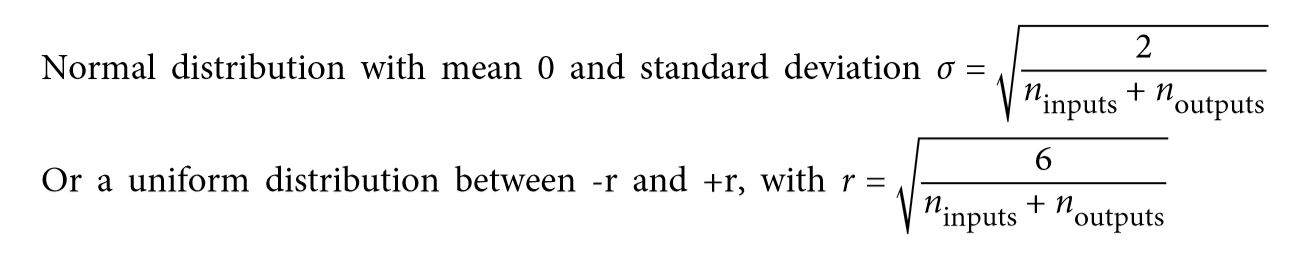

# Batch Normalization
In a 2015 paper, Sergey Ioffe and Christian Szegedy proposed a technique called Batch Normalization (BN) to address the vanishing/exploding gradients problems, and more generally the problem that the distribution of each layer’s inputs changes during training, as the parameters of the previous layers change (which they call the Internal Covariate Shift problem). The technique consists of adding an operation in the model just before the activation function of each layer, simply zero-centering and normalizing the inputs, then scaling and shifting the result using two new parameters per layer (one for scaling, the other for shifting). In other words, this operation lets the model learn the optimal scale and mean of the inputs for each layer. In order to zero-center and normalize the inputs, the algorithm needs to estimate the inputs’ mean and standard deviation. It does so by evaluating the mean and standard deviation of the inputs over the current mini-batch (hence the name “Batch Normalization”). The whole operation is summarized in Equation 11-3. <br /> 
• μB is the empirical mean, evaluated over the whole mini-batch B.  <br /> 
• σB is the empirical standard deviation, also evaluated over the whole mini-batch.  <br /> 
• mB is the number of instances in the mini-batch. <br /> 
• x(i) is the zero-centered and normalized input.
• γ is the scaling parameter for the layer.<br /> 
• β is the shifting parameter (offset) for the layer.<br />
• ϵ is a tiny number to avoid division by zero (typically 10–3
This is called a smoothing term.<br />
• z(i) is the output of the BN operation: it is a scaled and shifted version of the inputs.Ref:1 chapter 11
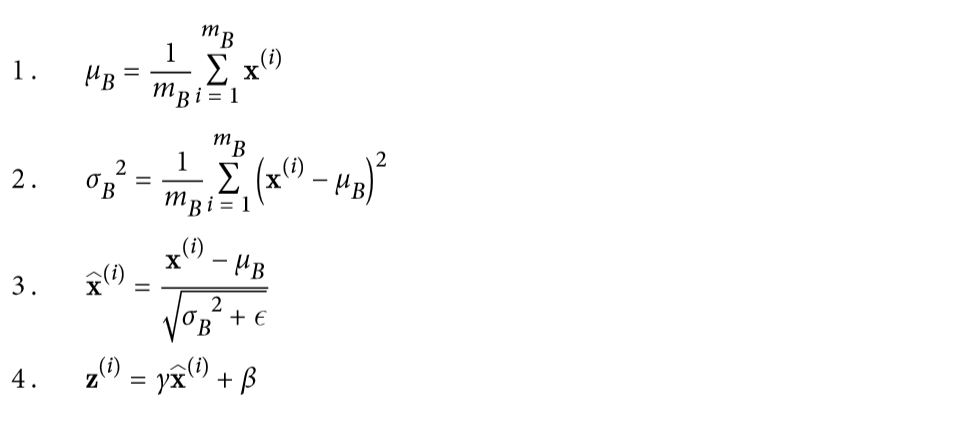

In [198]:
#Batch normalizaion function and He initializer
from functools import partial
batch_norm_momentum=0.95

he_init = tf.variance_scaling_initializer()

Custom_batch_normalized_layer = partial(
            tf.layers.batch_normalization,
            training=training,
            momentum=batch_norm_momentum)

Custum_dense_layer = partial(
            tf.layers.dense,kernel_initializer=he_init, use_bias=True, bias_initializer=tf.zeros_initializer(),
kernel_regularizer=max_norm_reg)

#  Activation Function (ELU)
“Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs),” D. Clevert, T. Unterthiner, S. Hochreiter (2015).
paper by Djork-Arné Clevert et al. proposed a new activation function called the exponential linear unit (ELU) that outperformed all the ReLU variants in their experiments: training time was reduced and the neural network performed better on the test set. It is represented in Figure, and Equation  shows its definition.
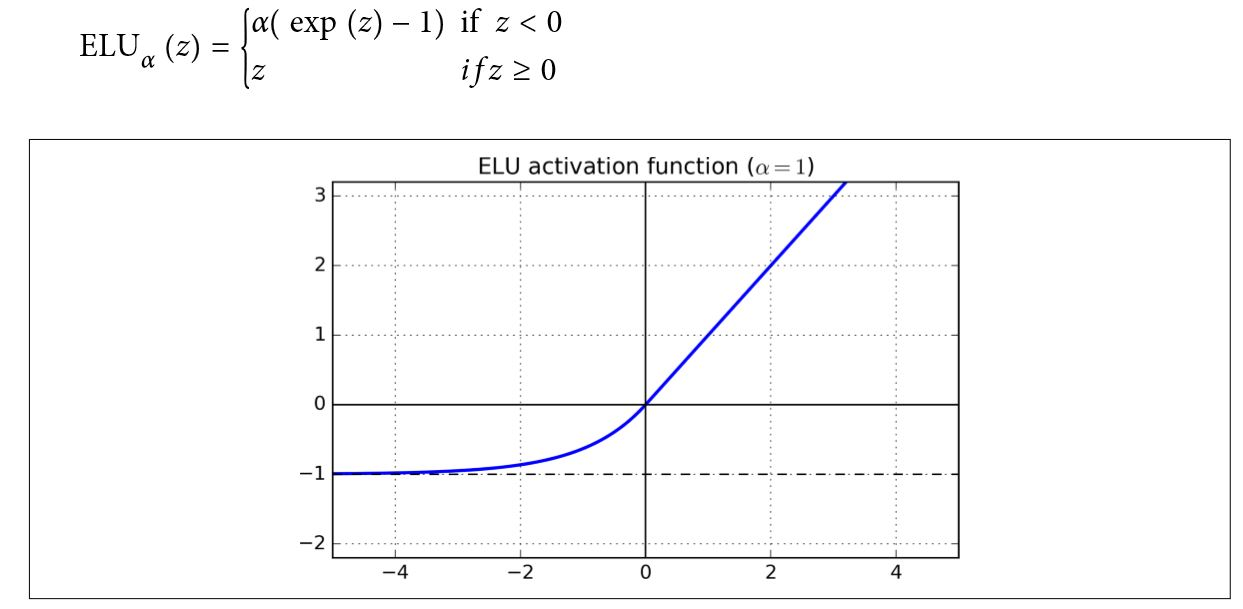

In [199]:
with tf.name_scope("dnn"):
    
    #layer1   
    hidden1 =Custum_dense_layer(X, n_hidden1,name="hidden1")
    bn1 = Custom_batch_normalized_layer(hidden1)
    hidden1_bn = tf.nn.relu(bn1)
    hidden1_drop = tf.layers.dropout(hidden1_bn, dropout_rate_1, training=training)

    #layer2   
    hidden2 =Custum_dense_layer(hidden1_drop, n_hidden2,name="hidden2")
    bn2 = Custom_batch_normalized_layer(hidden2)
    hidden2_bn = tf.nn.relu(bn2)
    hidden2_drop = tf.layers.dropout(hidden2_bn, dropout_rate_2, training=training)
    
    #layer3   
    hidden3 =Custum_dense_layer(hidden2_drop, n_hidden3,name="hidden3")
    bn3 = Custom_batch_normalized_layer(hidden3)
    hidden3_bn = tf.nn.relu(bn3)
    hidden3_drop = tf.layers.dropout(hidden3_bn, dropout_rate_3, training=training)
    
    #layer4
    hidden4 =Custum_dense_layer(hidden3_drop, n_hidden4,name="hidden4")
    bn4 = Custom_batch_normalized_layer(hidden4)
    hidden4_bn = tf.nn.relu(bn4)
    hidden4_drop = tf.layers.dropout(hidden4_bn, dropout_rate_4, training=training)
    #layer5
    hidden5 = Custum_dense_layer( hidden4_drop,n_hidden5,name="hidden5")
    bn5= Custom_batch_normalized_layer(hidden5)
    hidden5_n = tf.nn.elu(bn5)
    hidden5_drop= tf.layers.dropout(hidden5_n, dropout_rate_5, training=training)
    #layer6
    hidden6 = Custum_dense_layer( hidden5_drop,n_hidden6,name="hidden6")
    bn6= Custom_batch_normalized_layer(hidden6)
    hidden6_n = tf.nn.elu(hidden6)
    hidden6_drop= tf.layers.dropout(hidden6_n,dropout_rate_6, training=training)

    
    #output
    y_pred_before_BN = Custum_dense_layer(hidden6_drop,n_outputs,name="outputs")
    y_pred=Custom_batch_normalized_layer( y_pred_before_BN)







In [200]:
#Loss calculation and optimizer

mse = tf.losses.mean_squared_error(y,y_pred)




with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(mse,global_step=global_step)

init = tf.global_variables_initializer()

# Batch Shuffling
Shuffling the data after each epoch ensures that we will not be "stuck" with too many bad batches. In regular stochastic gradient descent, when each batch has size is small, we still want to shuffle our data after each epoch to keep our learning general.

In [201]:
#batch making and shuffling
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# Gradient Clipping
A popular technique to lessen the exploding gradients problem is to simply clip the gradients during backpropagation so that they never exceed some threshold . This is called Gradient Clipping. In general people now prefer Batch Normalization, but it’s still useful. 

In [202]:
#Clipping gradient and saver object
saver = tf.train.Saver()
clip_all_weights=tf.get_collection("max_norm")

# Cross-validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. Here we used 5 random states for splitting train-validation. The more states we can check on the better but for the case of ensuring generalization, we used 5 states which can approximate our data distribution and can be time and memory efficient.

# Learning-Curve
A learning curve is a correlation between a learner's performance on a task and the number of attempts or time required to complete the task; this can be represented as a direct proportion on a graph. The x-axis represents the time taken here it is the epoch and the y-axis represents the performance here it is the error. From the learning curve of our Deep model, we verified that the model is learning the data as less training errors are made. At first, when there was no regularization the validation error stopped decreasing at a certain point rather it was increasing and the training error was decreasing rapidly. At that point, I realized that the model was overfitting and I need to regularize the model in order the model to generalize well on the test and real data to perform better prediction.  

# Early Stopping
To avoid overfitting the training set, a great solution is early stopping: just interrupt training when its performance on the validation set starts dropping. One way to implement this with TensorFlow is to evaluate the model on a validation set at regular intervals (e.g., every 50 steps), and save a “winner” snapshot if it outperforms previous “winner” snapshots. Count the number of steps since the last “winner” snapshot was saved, and interrupt training when this number reaches some limit (e.g., 2,000 steps). Then restore the last “winner” snapshot.

# Failed trails
The learning curve shows 2 layers, without regularization. It is the same architecture as the final model.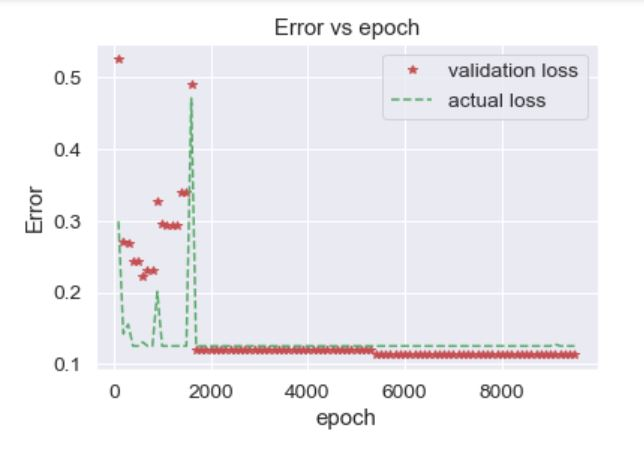This one just got lucky! Other learning curves were representing an increase in validation error and decrease the training error after few epochs. So, We decided to regularize. We used batch normalization and  Max norm regularization. We also added drop out after large dense layers. We set the dropout rate after observing some other learning curves closely. Those learning curves are given in the Hyperparameter section. 

Epoch_number 0 Batch error: 2.0243006 Val error: 1.9371996
Epoch_number 100 Batch error: 0.14177608 Val error: 0.12888266
Epoch_number 200 Batch error: 0.13950492 Val error: 0.12269652
Epoch_number 300 Batch error: 0.08999168 Val error: 0.114093386
Epoch_number 400 Batch error: 0.108366236 Val error: 0.114006534
Epoch_number 500 Batch error: 0.111593075 Val error: 0.11383667
Epoch_number 600 Batch error: 0.112455 Val error: 0.11350377
Epoch_number 700 Batch error: 0.1997459 Val error: 0.11358155
Epoch_number 800 Batch error: 0.14217366 Val error: 0.113473415
Epoch_number 900 Batch error: 0.109491706 Val error: 0.11347654
Epoch_number 1000 Batch error: 0.112372264 Val error: 0.11347249
Epoch_number 1100 Batch error: 0.17726806 Val error: 0.1134724
Epoch_number 1200 Batch error: 0.1661589 Val error: 0.113472015
Early stopping!


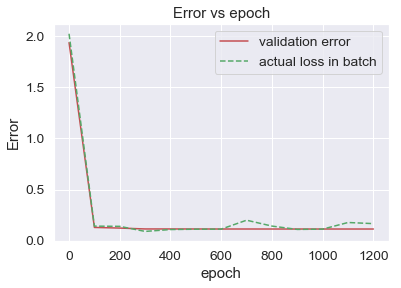

Epoch_number 0 Batch error: 1.7725182 Val error: 1.9011812
Epoch_number 100 Batch error: 0.18303944 Val error: 0.11334362
Epoch_number 200 Batch error: 0.10676617 Val error: 0.113746874
Epoch_number 300 Batch error: 0.084490545 Val error: 0.11218197
Epoch_number 400 Batch error: 0.11992645 Val error: 0.11200128
Epoch_number 500 Batch error: 0.15959364 Val error: 0.11196439
Epoch_number 600 Batch error: 0.11219174 Val error: 0.112987556
Epoch_number 700 Batch error: 0.110724136 Val error: 0.112272404
Epoch_number 800 Batch error: 0.14716248 Val error: 0.11248889
Early stopping!


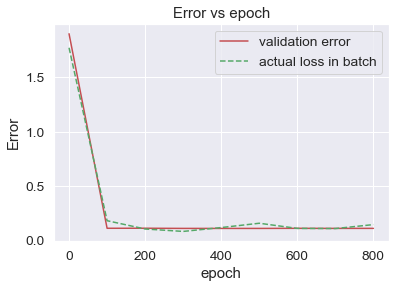

Epoch_number 0 Batch error: 1.9945061 Val error: 1.8969061
Epoch_number 100 Batch error: 0.18968725 Val error: 0.1255226
Epoch_number 200 Batch error: 0.11157257 Val error: 0.13021302
Epoch_number 300 Batch error: 0.11565513 Val error: 0.12073014
Epoch_number 400 Batch error: 0.09659472 Val error: 0.12195931
Epoch_number 500 Batch error: 0.16308402 Val error: 0.12400418
Epoch_number 600 Batch error: 0.11295962 Val error: 0.121012576
Epoch_number 700 Batch error: 0.10715138 Val error: 0.12068364
Epoch_number 800 Batch error: 0.09559215 Val error: 0.121564604
Early stopping!


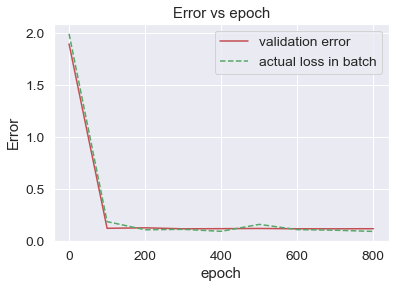

Epoch_number 0 Batch error: 1.8767157 Val error: 1.848006
Epoch_number 100 Batch error: 0.08558106 Val error: 0.10363468
Epoch_number 200 Batch error: 0.10783721 Val error: 0.11385247
Epoch_number 300 Batch error: 0.124515936 Val error: 0.10375355
Epoch_number 400 Batch error: 0.097528145 Val error: 0.10369143
Epoch_number 500 Batch error: 0.10765939 Val error: 0.10501677
Early stopping!


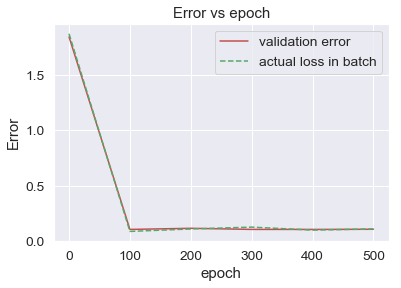

In [203]:
#Session with Early stopping mechanism and random state cross validation
best_loss_overall = np.infty
checks_without_progress = 0
for i in range(0,4):
    X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_train, y_train, test_size=0.25, random_state=i)
    max_checks_without_progress = 500
    best_loss = np.infty
    loss_val_list=[]
    epoch_list=[]
    loss_actual_list=[]
    with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
            for X_batch, y_batch in shuffle_batch(X_train_val, y_train_val, batch_size):
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
                sess.run(clip_all_weights)
            loss_val = mse.eval(feed_dict={X: X_test_val, y: y_test_val})
            #Check whether to stop or not
            if loss_val < best_loss:
                best_loss = loss_val
                checks_without_progress = 0
                if loss_val<best_loss_overall:
                    save_path = saver.save(sess,"./Final_Certairi.ckpt")
                    best_loss_overall=loss_val
            else:
                checks_without_progress += 1
                if checks_without_progress > max_checks_without_progress:
                    print("Early stopping!")
                    break
            #printing at run time
            if epoch %100==0:
                acc_batch = mse.eval(feed_dict={X: X_batch, y: y_batch})
                acc_val = mse.eval(feed_dict={X: X_test_val, y: y_test_val})
                loss_val_list.append(acc_val)
                loss_actual_list.append(acc_batch)
                epoch_list.append(epoch)
                print("Epoch_number",epoch, "Batch error:", acc_batch, "Val error:", acc_val)
        pred=y_pred.eval(feed_dict={X: x_test})
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.plot(epoch_list,loss_val_list,'r',label='validation error')
    plt.plot(epoch_list,loss_actual_list,'g--',label='actual loss in batch')
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('epoch')
    plt.title('Error vs epoch')    
    plt.show()      

In [204]:
with tf.Session() as sess:
    saver.restore(sess, "./Final_Certairi.ckpt")
    pred_best=y_pred.eval(feed_dict={X: x_test})

# Decession
From the above learning curves, we came to conclude that the model is not overfitting anymore. Now we can take the optimized weights to predict on the test. We took the set of weights which gave the least validation error across all the validation folds and epochs.

In [205]:
pred_non_expo=np.expm1(pred_best)

sub = pd.DataFrame()

sub['Id'] = test_ID
sub['SalePrice'] = pred_non_expo

sub.to_csv('Final With Early stopping.csv',index=False)

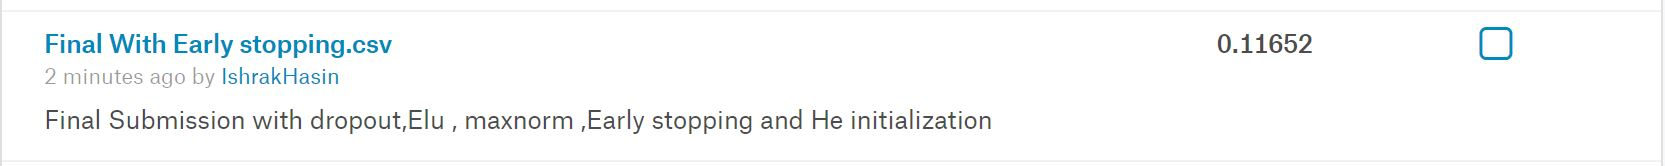

# Justifying my Parameter choice
Prior to this model, I fitted almost 13 models. When I used only 1 hidden layer I got the public score of 0.482. Then I used 2 layers and got  0.420 public scores in kaggle. After that, I did a couple of more submission with regularization and dropout and got 0.281. I only used drop out and regulation when I saw the model is completely memorizing and the training error was consistently decreasing while the validation error was not decreasing any more but increasing and the public score was poor. I used the learning curve to observe that but for avoiding repetition of code I  deprecated that part. Then I consistently started making deeper model unless there is a stoppage in the increase of public score. My previous trails can be found in the GitHub link. Moreover, I have changed the random seed for train_test spit as well the size of the validation set to perform manual cross-validation. For both of the DNN we chosed number of neuron in a way that satisfies the below constraint.The upper bound on the number of hidden neurons that won't result in over-fitting is: 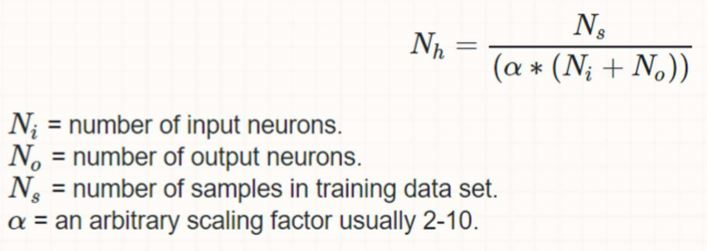

# Simple DNN for Prototyping

In [206]:
learning_rate = 0.1 
num_steps =4000
beta = .005
hidden_1 = 16 
hidden_2 = 8
hidden_3 = 4 
input_dim = x_train.shape[1]
output_dim = 1  
X_tf = tf.placeholder("float32" ) 
y_tf = tf.placeholder("float32" ) 

# Weights and Bias
Node: It is the basic unit of a neural network. It gets certain number of inputs and a bias value. When a signal(value) arrives, it gets multiplied by a weight value. If a neuron has 4 inputs, it has 4 weight values which can be adjusted during training time.<br /> 
Bias(ofset):It is an extra input to neurons and it is always 1, and has it’s own connection weight. This makes sure that even when all the inputs are none (all 0’s) there’s gonna be an activation in the neuron

In [207]:
weights = {'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),  
           'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),  
           'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])), 
           'out': tf.Variable(tf.random_normal([hidden_3, output_dim ])) }

biases = {'b1': tf.Variable(tf.random_normal([hidden_1])),
          'b2': tf.Variable(tf.random_normal([hidden_2])),
          'b3': tf.Variable(tf.random_normal([hidden_3])),
          'out': tf.Variable(tf.random_normal([output_dim])) } 

# Connections
It connects one neuron in one layer to another neuron in other layer or the same layer. A connection always has a weight value associated with it. Goal of the training is to update this weight value to decrease the loss(error).

# Activations
Activation functions are used to introduce non-linearity to neural networks. It squashes the values in a smaller range viz. a Sigmoid activation function squashes values between a range 0 to 1. There are many activation functions used in deep learning industry and ReLU, SeLU and TanH are preferred over sigmoid activation function.

In [208]:
 def ann_model(X_val): 
        layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1' ]) 
        layer_1 = tf.nn.relu(layer_1) 
        layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2) 
        layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']) 
        layer_3 = tf.nn.relu(layer_3)
        layer_out = tf.add(tf.matmul(layer_3, weights['out']), biases ['out']) 
        return layer_out 

# Loss Function/Cost Function 
The loss function computes the error for a single training example. The cost function is the average of the loss functions of the entire training set.<br /> 
<br /> 
1.‘mse’: for mean squared error.<br /> 
2.‘binary_crossentropy’: for binary logarithmic loss (logloss).<br /> 
3.‘categorical_crossentropy’: for multi-class logarithmic loss (logloss).<br /> 
Here we used MSE

In [209]:
# Model Construct 
model = ann_model(X_tf) 
# Mean Squared Error cost function
cost = tf.reduce_mean(tf.square(y_tf - model)) 


# Regularization
It is used to overcome the over-fitting problem. In regularization we penalise our loss term by adding a L1 (LASSO) or an L2(Ridge) norm on the weight vector w (it is the vector of the learned parameters in the given algorithm).
L(Loss function) + λN(w) — here λ is your regularization term and N(w) is L1 or L2 norm. Here L2 is used.


In [210]:
regularizer_1 = tf.nn.l2_loss(weights['w1']) 
regularizer_2 = tf.nn.l2_loss(weights['w2']) 
regularizer_3 = tf.nn.l2_loss(weights['w3']) 
loss = tf.reduce_mean(cost + beta*regularizer_1 + beta*regularizer_2 
                      + regularizer_3)

# Model Optimizers
The optimizer is a search technique, which is used to update weights in the model.<br /> 

SGD: Stochastic Gradient Descent, with support for momentum.<br /> 

RMSprop: Adaptive learning rate optimization method proposed by Geoff Hinton.<br /> 

Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates<br /> 
Here we used Adam.

In [211]:
# Adam optimizer will update weights and biases after each step 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [212]:
# Initialize variables 
init = tf.global_variables_initializer() 

In [213]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver() 

# Graph and Session
TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices.


In [219]:
#methord defination for ploting 
def plot_grid(ax,X,Y1,Y2,Title2):    
     ax.plot(X,Y1,label='VE')
     ax.plot(X,Y2,label='TE')
     ax.locator_params(nbins=3)
     ax.set_xlabel('Epochs',fontsize=12)
     ax.set_ylabel('Error',fontsize=12)
     ax.set_title(Title2,fontsize=12)
plt.close('all')
plt.rcParams['figure.figsize'] = [20, 20]

In [220]:
#Session with early stop and cross validation
best_loss_overall = np.infty
epoch_list_2d=[]
loss_val_list_2d=[]
loss_actual_list_2d=[]
Title_list=[]
checks_without_progress = 0
max_checks_without_progress = 500

In [221]:
for l in range(0,4):
    X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_train, y_train, test_size=0.25, random_state=l)
    best_loss = np.infty
    epoch_list=[]
    loss_val_list=[]
    loss_actual_list=[]
    print("Cross_valid:",l)
    with tf.Session() as sess: 
            sess.run(init) 
            for i in range(num_steps): 
                sess.run(optimizer, feed_dict={X_tf:X_train_val, y_tf:y_train_val})  
                if (i+1)%100 == 0: 
                    loss_val = cost.eval(feed_dict={X_tf: X_test_val, y_tf: y_test_val})
                    loss_acc = cost.eval(feed_dict={X_tf: X_train_val, y_tf: y_train_val})

                    #print("epoch no : ",i+1,"val Loss",loss_val,"train loss",loss_acc) 
                    epoch_number=i+1
                    epoch_list.append(epoch_number)
                    loss_val_list.append(loss_val)
                    loss_actual_list.append(loss_acc)
                               #Check whether to stop or not
                    if loss_val < best_loss:
                        best_loss = loss_val
                        checks_without_progress = 0
                        if loss_val<best_loss_overall:
                            save_path = saver.save(sess,"./Final_Certairi2.ckpt")
                            best_loss_overall=loss_val        
                    else:
                        checks_without_progress += 1
                        if checks_without_progress > max_checks_without_progress:
                            print("Early stopping!")
                            break
            save_path = saver.save(sess, "/tmp/final2.ckpt") 
            #print("Model saved in path: %s" % save_path) 
            pred_model = sess.run(model, feed_dict={X_tf:x_test}) 
    Title="cross validation "+ str(l)
    loss_val_list_2d.append(loss_val_list)
    loss_actual_list_2d.append(loss_actual_list)
    Title_list.append(Title)
    epoch_list_2d.append(epoch_list)   

Cross_valid: 0
Cross_valid: 1
Cross_valid: 2
Cross_valid: 3


In [224]:
#function for Generating learning curve
def plot_learningcurve(counterI=0,num_colsI=2,num_rowsI=2):
    counter=counterI;num_cols=num_colsI;num_rows=num_rowsI
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*3.5,num_rows*3))
    for r_idx in range(num_rows):
        for c_idx in range(num_cols):
            col_idx = r_idx*3+c_idx 
            ax=axes[r_idx][c_idx]
            plot_grid(ax,epoch_list_2d[counter],loss_val_list_2d[counter],loss_actual_list_2d[counter],Title_list[counter])
            counter=counter+1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.legend()
    plt.show()

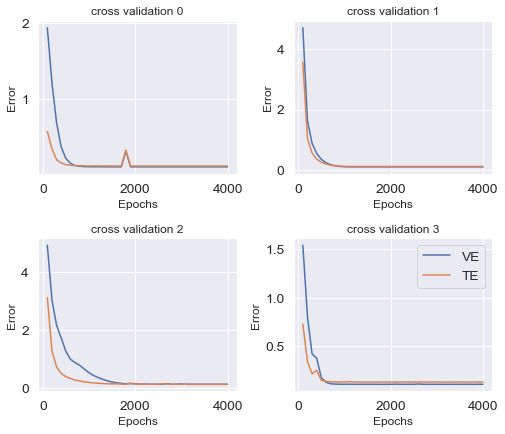

In [225]:
plot_learningcurve(counterI=0,num_colsI=2,num_rowsI=2)

In [228]:
# using best weights (according to validation loss) to predict
with tf.Session() as sess:
    saver.restore(sess, "./Final_Certairi2.ckpt")
    pred_best = sess.run(model, feed_dict={X_tf:x_test}) 

In [229]:
prediction = np.expm1(pred_best) 

In [230]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = prediction
sub.to_csv('Super.csv',index=False)

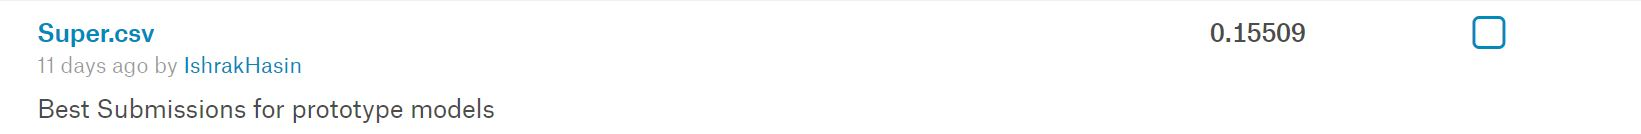

Note: The Final model is the model above the current model. The last model is the simplified model for quick prototyping. 

# Searching for best parameters


We searched over the number of neurons per layer, batch size, beta(LaGrange constraint )for best parameter fitting. This also shows that other parameters can be searched in a similar fashion using more for loops. I intentionally did not show all the parameter tuning because that takes a lot of time and produce a huge output which makes it hard for the reader to read the notebook.

In [231]:
neuron_number_list_layer_3=[4,3,2]
neuron_number_list_layer_2=[16,8]
neuron_number_list_layer_1=[100,64,32]
num_steps=2000

1.There were actually a lot for combinations on neuron number.<br /> 
2.Lessened epoch for readers convenent but in actual run for paramerter search it was 100000 with early stop mechanism.<br />
3.Only search on neuron number is shown but we played the same game with dropout rate.<br />
4.with layers number(manualy),batch size and so on and so forth.

In [232]:
#Session with ealy stop and cross validation
epoch_list_2d=[]
loss_val_list_2d=[]
loss_actual_list_2d=[]
Title_list=[]
best_loss_overall = np.infty
max_checks_without_progress = 500
checks_without_progress = 0

In [233]:
for a in neuron_number_list_layer_1:
    for b in neuron_number_list_layer_2: 
        for c in neuron_number_list_layer_3:
            hidden_1 = a;hidden_2 = b;hidden_3=c
            weights = {'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])), 
                       'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
                       'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
                       'out': tf.Variable(tf.random_normal([hidden_3, output_dim ])) }
            biases = {'b1': tf.Variable(tf.random_normal([hidden_1])),
                      'b2': tf.Variable(tf.random_normal([hidden_2])),
                      'b3': tf.Variable(tf.random_normal([hidden_3])),
                      'out': tf.Variable(tf.random_normal([output_dim])) } 
            for l in range(0,2):
                X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_train,
                y_train, test_size=0.25, random_state=i)
                best_loss = np.infty
                epoch_list=[]
                loss_val_list=[]
                loss_actual_list=[]
                with tf.Session() as sess: 
                        sess.run(init) 
                        for i in range(num_steps): 
                            sess.run(optimizer, feed_dict={X_tf:X_train_val, y_tf:y_train_val})  
                            if (i+1)%100 == 0: 
                                loss_val = cost.eval(feed_dict={X_tf: X_test_val, y_tf: y_test_val})
                                loss_acc = cost.eval(feed_dict={X_tf: X_train_val, y_tf: y_train_val})
                                epoch_list.append(i)
                                loss_val_list.append(loss_val)
                                loss_actual_list.append(loss_acc)
                                if loss_val < best_loss:
                                    if loss_val<best_loss_overall:
                                        save_path = saver.save(sess,"./Final_Certairi3.ckpt")
                                        best_loss_overall=loss_val
                                    best_loss = loss_val
                                else:
                                    checks_without_progress += 1
                                    if checks_without_progress > max_checks_without_progress:
                                        print("Early stopping!")
                                        break
                        save_path = saver.save(sess, "/tmp/final3.ckpt") 
                        pred_model = sess.run(model, feed_dict={X_tf:x_test}) 
                Title="CV: "+ str(l)+" L1: "+str(a)+" L2: "+str(b)+" L3: "+str(c)
                loss_val_list_2d.append(loss_val_list)
                loss_actual_list_2d.append(loss_actual_list)
                Title_list.append(Title)
                epoch_list_2d.append(epoch_list)        

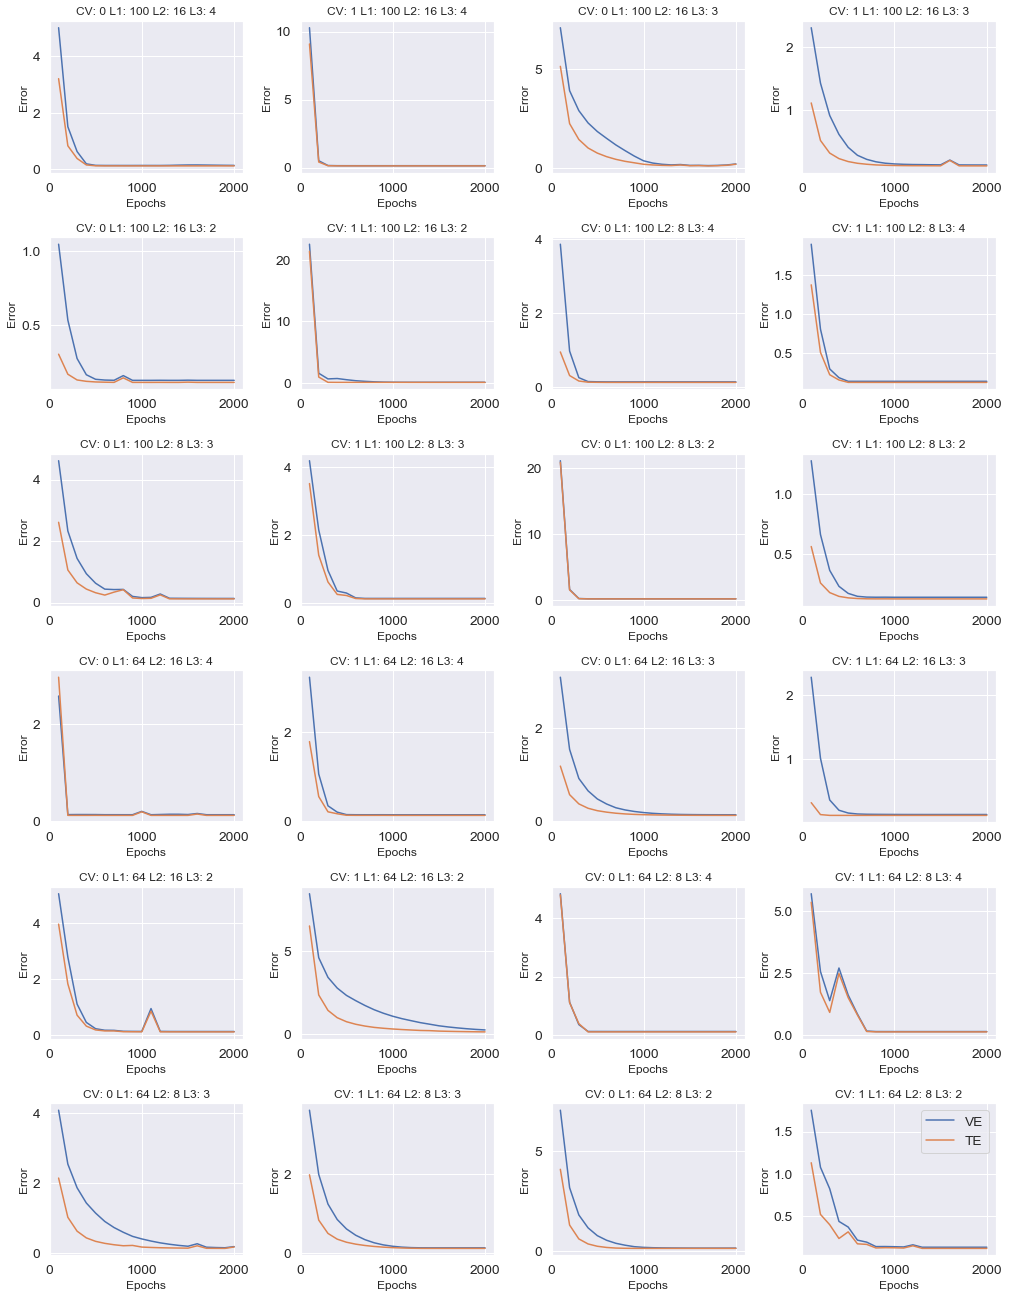

In [234]:
plot_learningcurve(counterI=0,num_colsI=4,num_rowsI=6)

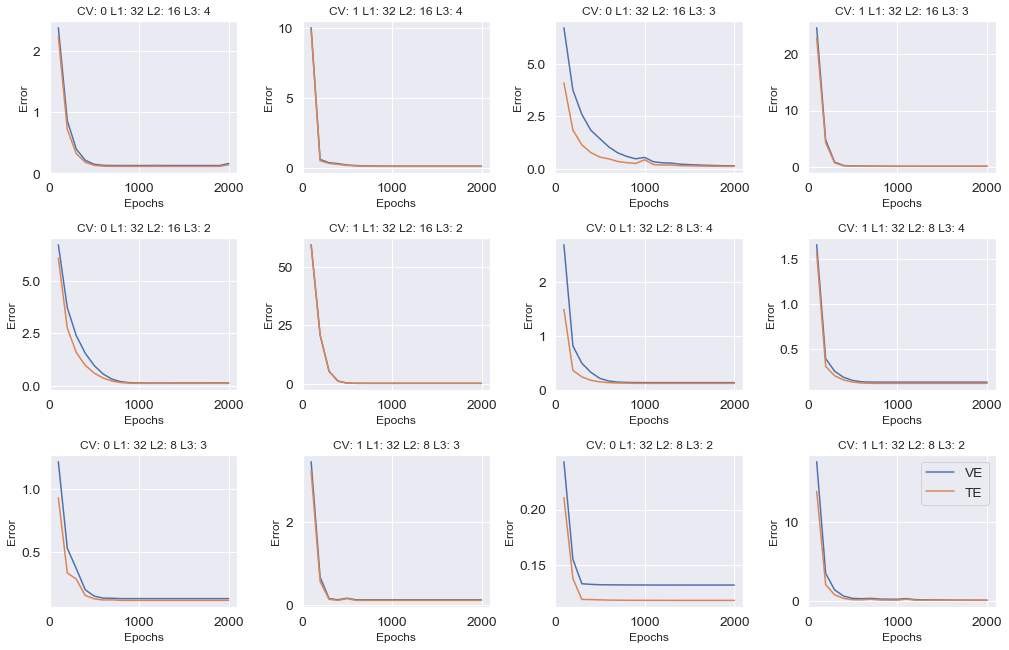

In [235]:
plot_learningcurve(counterI=24,num_colsI=4,num_rowsI=3)  

In [236]:
with tf.Session() as sess:
    saver.restore(sess, "./Final_Certairi3.ckpt")
    pred_best = sess.run(model, feed_dict={X_tf:x_test}) 

In [237]:
prediction = np.expm1(pred_best) 

# Note
1. This prediction is made from weights which are best among all the combinations and cross valid.
2. The best is decided on validation set error.
3. The final model is made up out of that searching on parameters but on a much larger scale.
4. Not only the neuron number but also the batch size, max norm threshold, the dropout rate was searched for the final model.
5. On the actual run for final model learning rate scheduler was used to get faster convergence.<br />
6. Therefore early stopping mechanism triggered much ofter.<br />

# Key insights from hyperparameter search
The following remarkable facts can be observed from the above learning curves generated for parameter search: 
1. The model was converging much slowly when we plugged in more neurons in outer layers.
2. The more neurons are used in outer layers (with regularization), the less loss is found in validation .
3. This made us convinced we need to have a trade-off.
4. We  used 32 neurons in the outer layer, then 16,8,4,2 and so on. It is a fair trade-off from our belief.
4. The following choices of the number of the neuron were making the model converge fast with generating least error.
5. We tried using more neuron and used high dropout rate with the nearly same result.
6. But adding more perhaps overfitted the model as we gotless stability in validation error. ofcouse it took more time to converge.
7. Dropout is used with batch normalization and max-norm regularization for fact 5.
8. Throughout the tuning Adam optimizer is used since RMS prop, SGD was performing much poorly even on a small network.
9. We deceided the number of layers maually. The result is showen in the chart below.
10. After playing much on 3 layered model's parameter we decided to overfit the model with 6 layers and then regularized sharply.
11. Using 7 or more layer might achieve a better result but would take significantly much more resource.
12. So we avoided that and stuck with 6 layers for a while.
13. We were surprised to get better result in validation set once we have given playing round with 5 layers a serious try.
14. It converged much fastly although no improvement was found in the kaggle score.
15. The other reason for keep using 5 layers is that the model needs to be regularized less.<br />

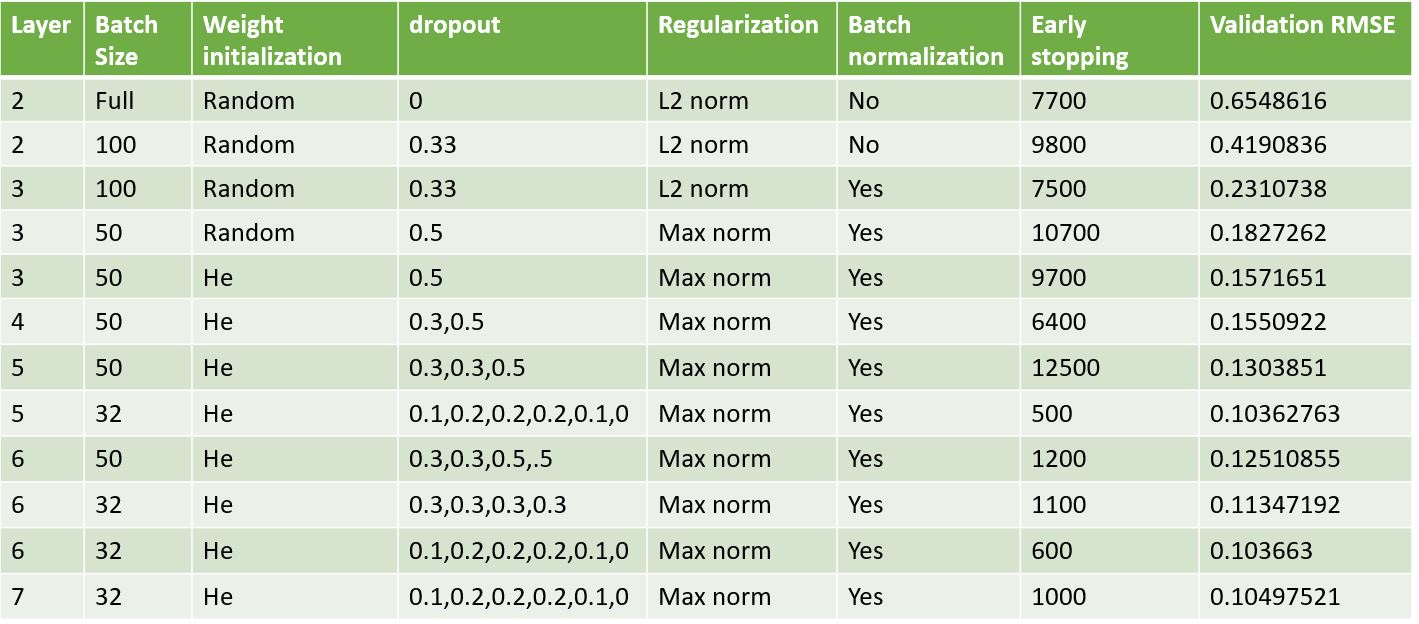

# Discussion


This above Final Model mentioned is highly flexible and can be tuned according to the necessity. We have an exhaustive search on top of that. That part took a bit long for the log.  For the final model, I used Max norm normalization and dropout as a regularizer. The kernel is regularized with batch normalization and initialized by the initialization. Dropout rates can be tuned per layer. As an activation function, I used elu instead of relu.Lastly, This is a pretty strong model and made without any prior on data preprocessing of that field so better result might be achieved with strong data preprocessing knowledge in this domain.

# Reference

Reference:<br /> 
   &nbsp; 1.Hands on Machine learning with Scikit Learn and Tensorflow by Aurelian Geron<br /> 
   &nbsp; 2.Skilearn,Tensorflow and Pandas documentation<br /> 
   &nbsp; 3.The deep learning book by Ian Goodfellow, Youshu Bengio and Aaron Courvillle<br /> 
&nbsp;    4.https://www.kaggle.com/blaskowitz100/eda-and-preprocessing-of-the-datasets<br /> 
   &nbsp; 5.https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset?fbclid=IwAR3KU9SPyMHTsLf8Xqd-&nbfdcACXyatnr82aC1DqnxfjS-f5PEyRPa508JEtI<br /> 
   &nbsp; 6.https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5<br /> 

Any suggestion is greatly welcomed.<br />
Mail Id for comment:hasinishrak12@gmail.com